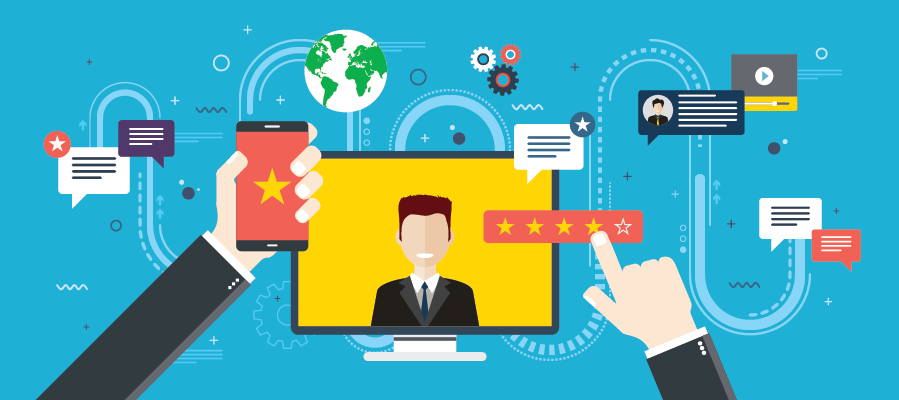

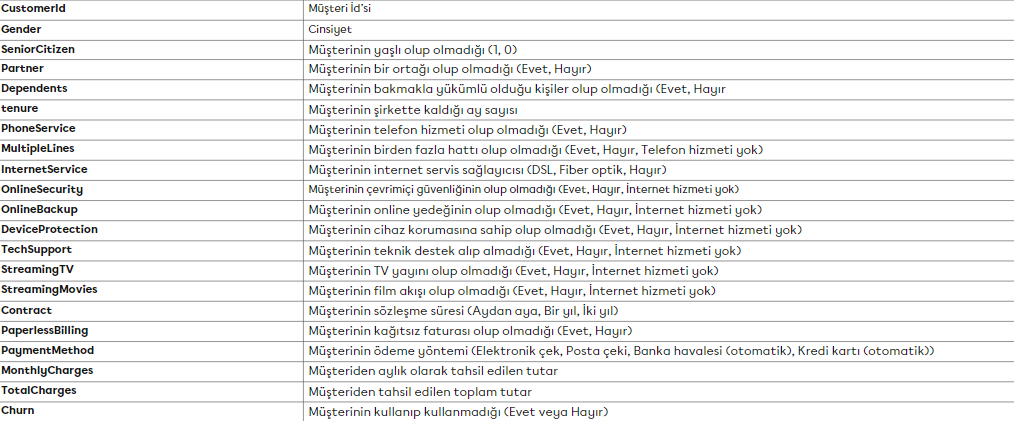

In [1]:
import warnings
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate ,RandomizedSearchCV ,validation_curve
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats
import statsmodels.stats.api as sms
import statsmodels.api as sm
from scipy.stats import ttest_1samp , shapiro , levene , ttest_ind ,mannwhitneyu ,pearsonr,spearmanr,kendalltau,f_oneway,kruskal

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
        roc_auc_score, confusion_matrix, classification_report, plot_roc_curve, mean_squared_error

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [2]:
data = pd.read_csv("C:/Users/can/Desktop/Telco-Customer-Churn.csv")
df = data.copy()

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.650,6844.5,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Veri ön işleme

In [6]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes != "O"]
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and df[col].dtypes == "O"]
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]

num_cols = [col for col in df.columns if df[col].dtypes != "O"]
num_cols = [col for col in num_cols if col not in num_but_cat]

cat_cols, num_cols, cat_but_car = cat_cols, num_cols, cat_but_car

In [7]:
pd.to_numeric(df["TotalCharges"], errors='ignore').dtype


dtype('O')

In [8]:
df.drop(columns="customerID", inplace=True)

In [9]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')


In [10]:
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)


### Kategorik değişken analizi

           Male   Female
gender 3555.000 3488.000
gender   50.476   49.524


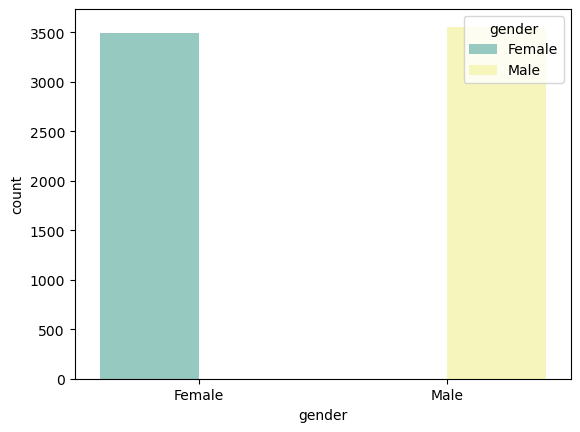

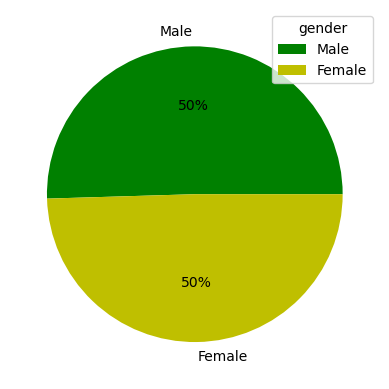

              No      Yes
Partner 3641.000 3402.000
Partner   51.697   48.303


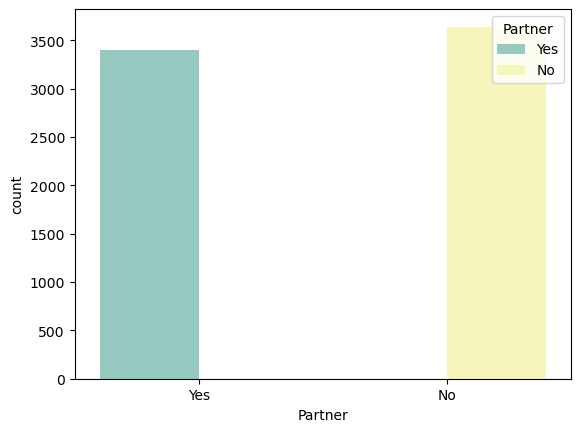

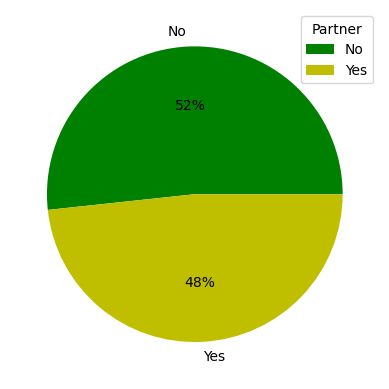

                 No      Yes
Dependents 4933.000 2110.000
Dependents   70.041   29.959


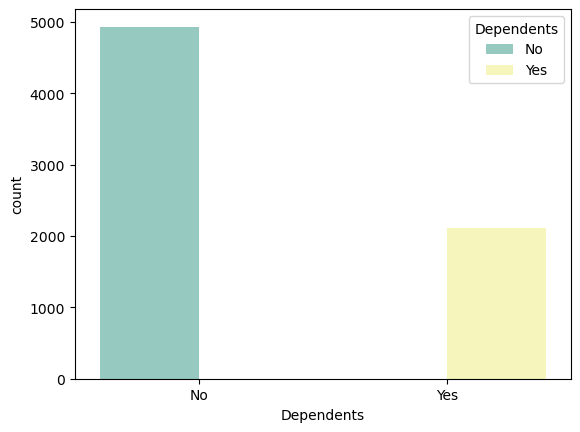

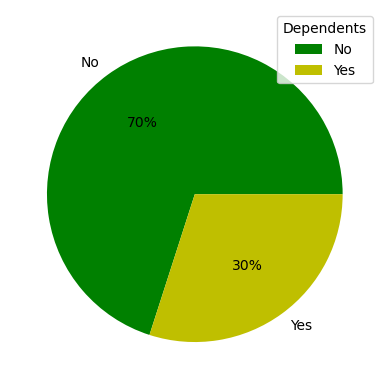

                  Yes      No
PhoneService 6361.000 682.000
PhoneService   90.317   9.683


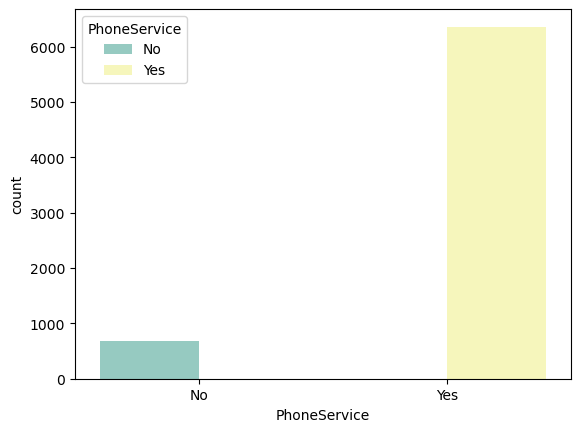

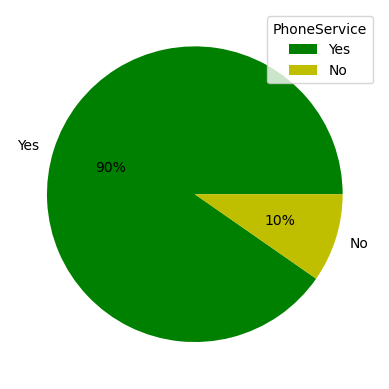

                    No      Yes  No phone service
MultipleLines 3390.000 2971.000           682.000
MultipleLines   48.133   42.184             9.683


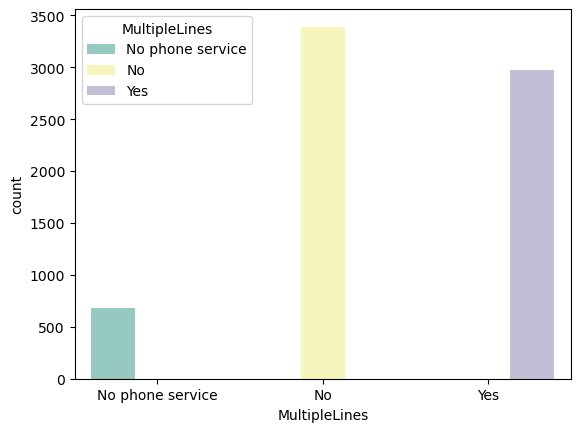

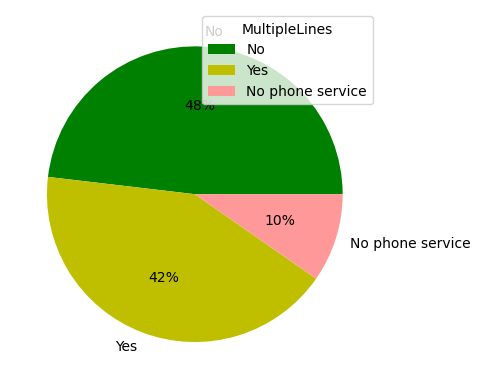

                 Fiber optic      DSL       No
InternetService     3096.000 2421.000 1526.000
InternetService       43.959   34.375   21.667


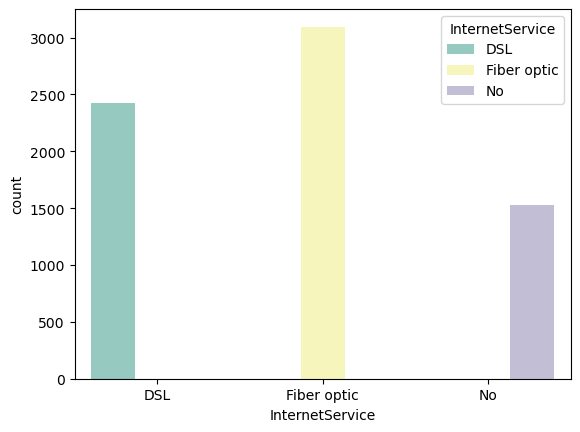

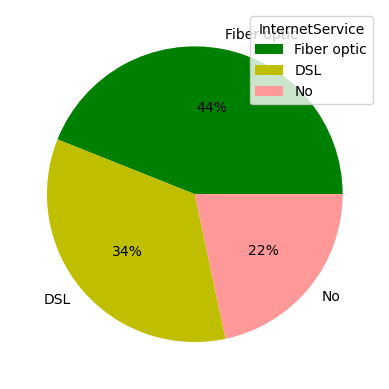

                     No      Yes  No internet service
OnlineSecurity 3498.000 2019.000             1526.000
OnlineSecurity   49.666   28.667               21.667


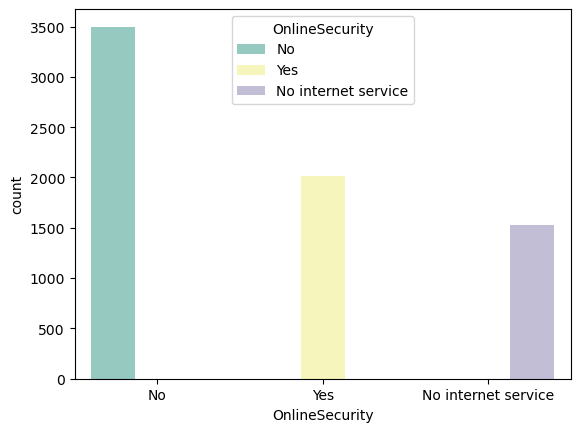

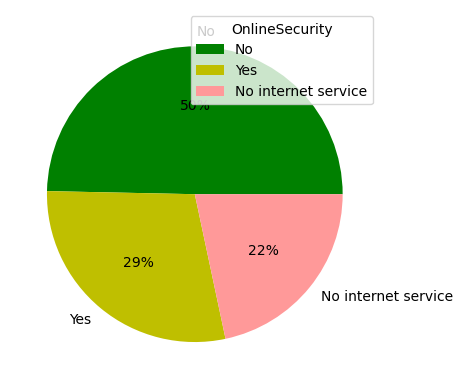

                   No      Yes  No internet service
OnlineBackup 3088.000 2429.000             1526.000
OnlineBackup   43.845   34.488               21.667


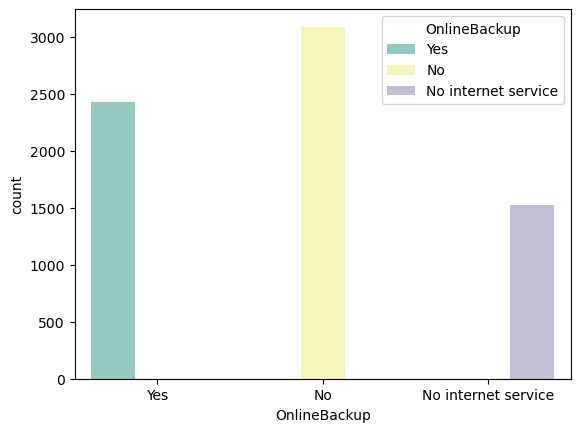

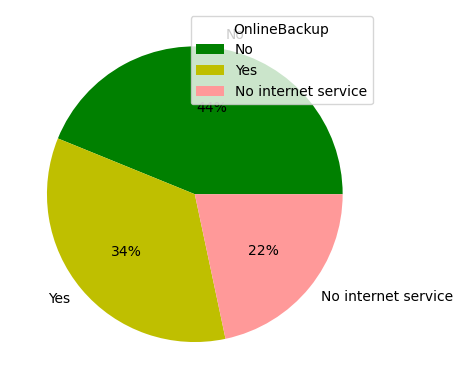

                       No      Yes  No internet service
DeviceProtection 3095.000 2422.000             1526.000
DeviceProtection   43.944   34.389               21.667


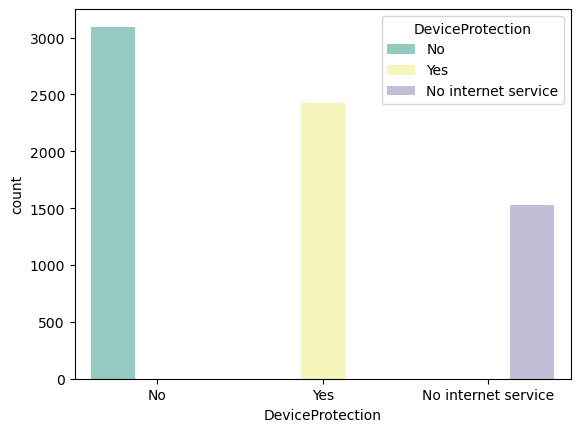

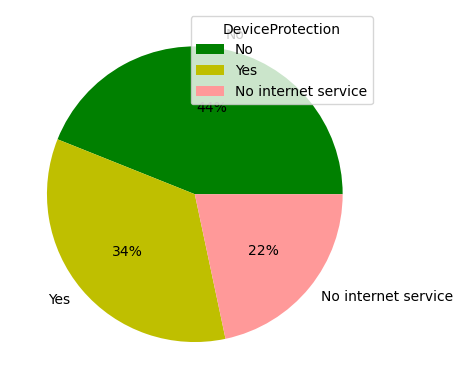

                  No      Yes  No internet service
TechSupport 3473.000 2044.000             1526.000
TechSupport   49.311   29.022               21.667


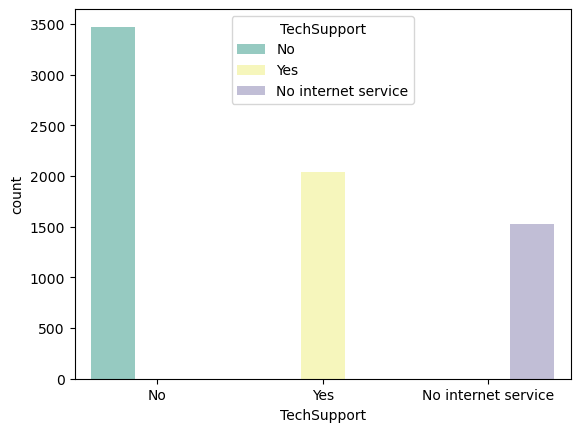

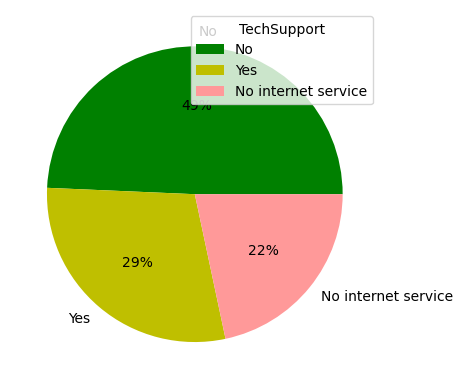

                  No      Yes  No internet service
StreamingTV 2810.000 2707.000             1526.000
StreamingTV   39.898   38.435               21.667


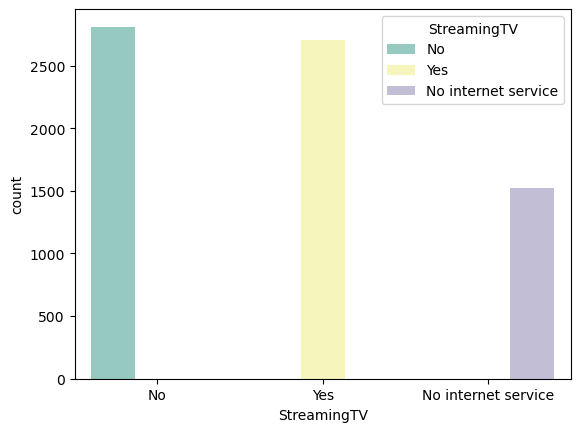

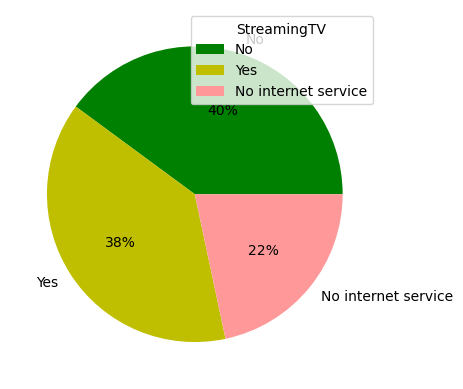

                      No      Yes  No internet service
StreamingMovies 2785.000 2732.000             1526.000
StreamingMovies   39.543   38.790               21.667


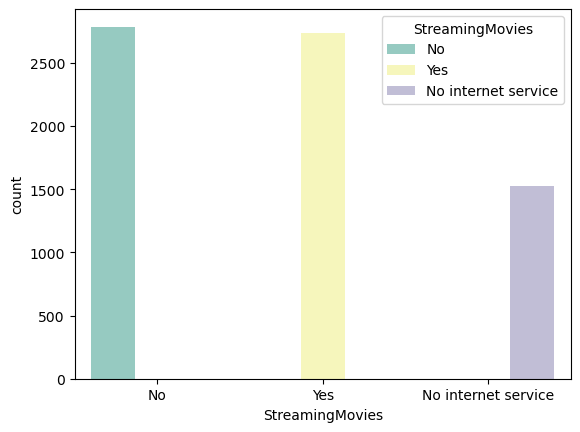

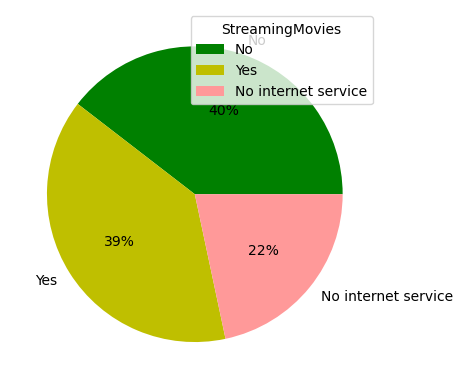

          Month-to-month  Two year  One year
Contract        3875.000  1695.000  1473.000
Contract          55.019    24.066    20.914


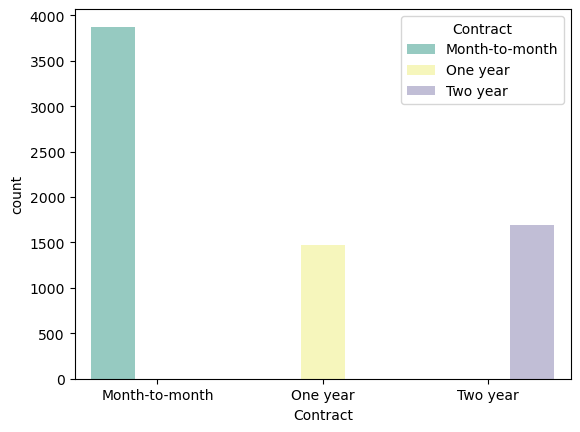

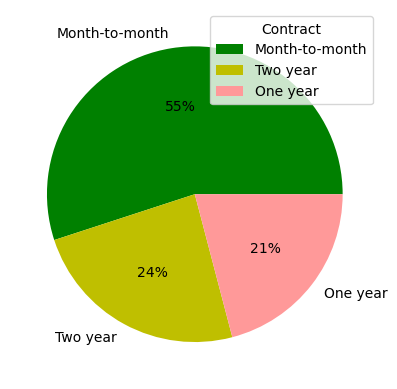

                      Yes       No
PaperlessBilling 4171.000 2872.000
PaperlessBilling   59.222   40.778


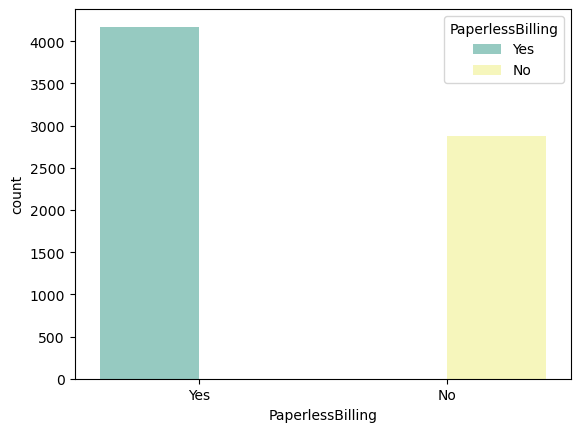

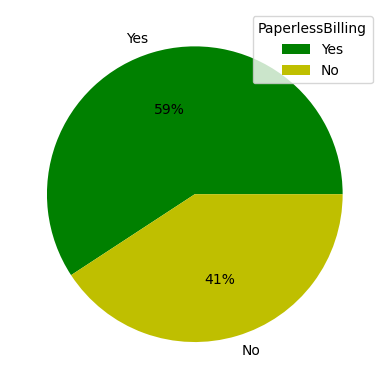

               Electronic check  Mailed check  Bank transfer (automatic)  Credit card (automatic)
PaymentMethod          2365.000      1612.000                   1544.000                 1522.000
PaymentMethod            33.579        22.888                     21.922                   21.610


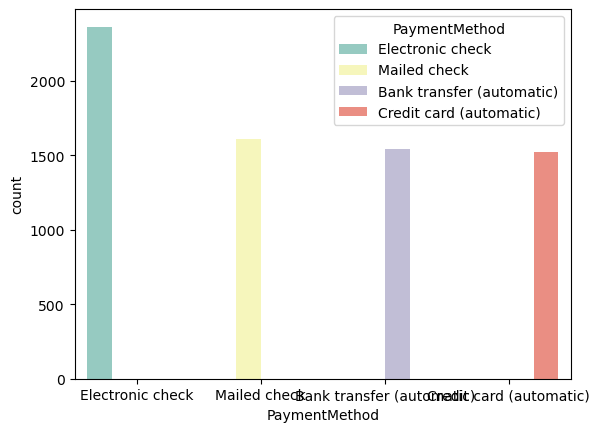

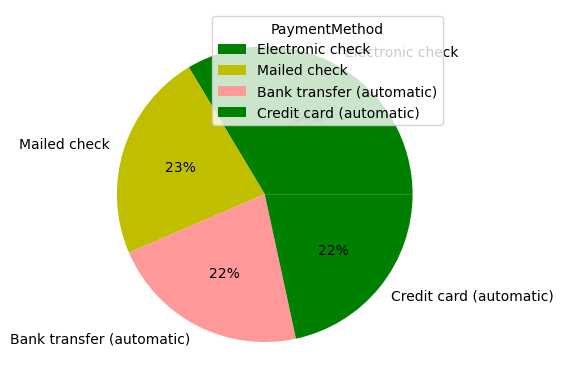

             0        1
Churn 5174.000 1869.000
Churn   73.463   26.537


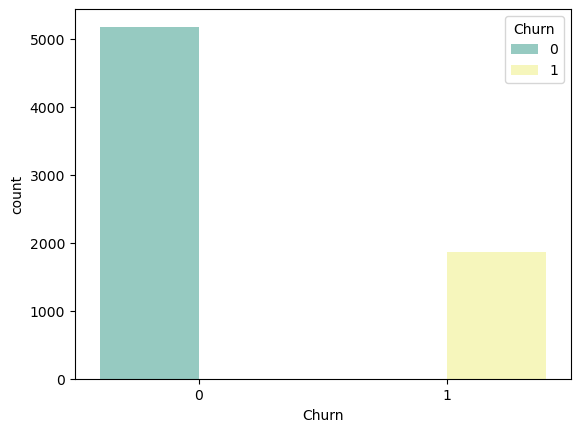

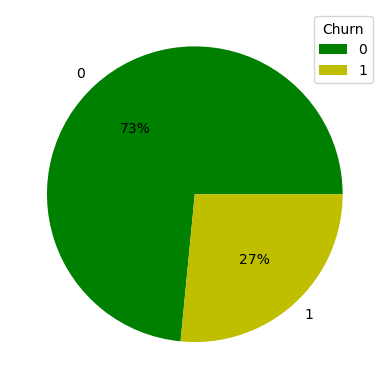

                     0        1
SeniorCitizen 5901.000 1142.000
SeniorCitizen   83.785   16.215


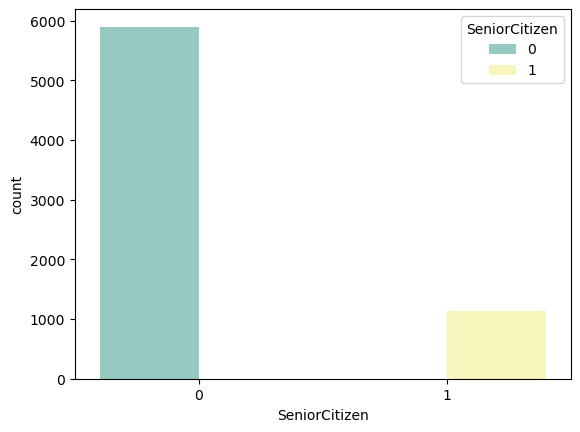

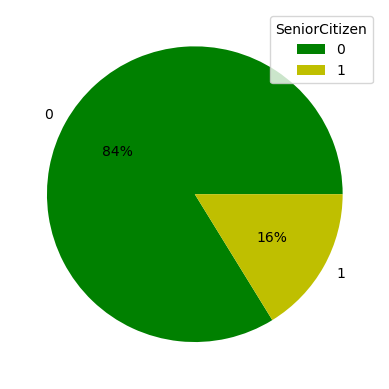

In [11]:
def kategorik_analiz(dataframe,col_name, pieplot = True ,countplot=True):
    print(pd.DataFrame((dataframe[col_name].value_counts(),dataframe[col_name].value_counts(normalize=True)*100)))
    
    if countplot:

        sns.countplot(x=df[col_name], hue=df[col_name], data=dataframe,palette="Set3")
        plt.legend(title = col_name)
        plt.show()
        
    if countplot:
        labels = df[col_name].value_counts().index
        my_colors = ["g", "y", "#ff9999"]
        plt.pie(df[col_name].value_counts(),labels=labels,colors=my_colors,autopct='%.0f%%')
        plt.legend(title = col_name)
        plt.show()        
        
        
for col in cat_cols:
    kategorik_analiz(df,col)

In [12]:
def rare_analyser(dataframe,target,cat_cols):
    for col in cat_cols:
        print(col,":",len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT":dataframe[col].value_counts(),
                           "RATIO":dataframe[col].value_counts()/len(dataframe),
                           "TARGET_MEAN": dataframe.groupby(col)[target].mean()}),end = "\n\n\n")
rare_analyser(df, "Churn", cat_cols)


gender : 2
        COUNT  RATIO  TARGET_MEAN
Female   3488  0.495        0.269
Male     3555  0.505        0.262


Partner : 2
     COUNT  RATIO  TARGET_MEAN
No    3641  0.517        0.330
Yes   3402  0.483        0.197


Dependents : 2
     COUNT  RATIO  TARGET_MEAN
No    4933  0.700        0.313
Yes   2110  0.300        0.155


PhoneService : 2
     COUNT  RATIO  TARGET_MEAN
No     682  0.097        0.249
Yes   6361  0.903        0.267


MultipleLines : 3
                  COUNT  RATIO  TARGET_MEAN
No                 3390  0.481        0.250
No phone service    682  0.097        0.249
Yes                2971  0.422        0.286


InternetService : 3
             COUNT  RATIO  TARGET_MEAN
DSL           2421  0.344        0.190
Fiber optic   3096  0.440        0.419
No            1526  0.217        0.074


OnlineSecurity : 3
                     COUNT  RATIO  TARGET_MEAN
No                    3498  0.497        0.418
No internet service   1526  0.217        0.074
Yes                   

### Numerik değişken analizi

In [13]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000,7043.000,7043.000,7032.000,7043.000
mean,0.162,32.371,64.762,2283.300,0.265
std,0.369,24.559,30.090,2266.771,0.442
min,0.000,0.000,18.250,18.800,0.000
25%,0.000,9.000,35.500,401.450,0.000
50%,0.000,29.000,70.350,1397.475,0.000
75%,0.000,55.000,89.850,3794.738,1.000
max,1.000,72.000,118.750,8684.800,1.000


count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
max       72.000
Name: tenure, dtype: float64


C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


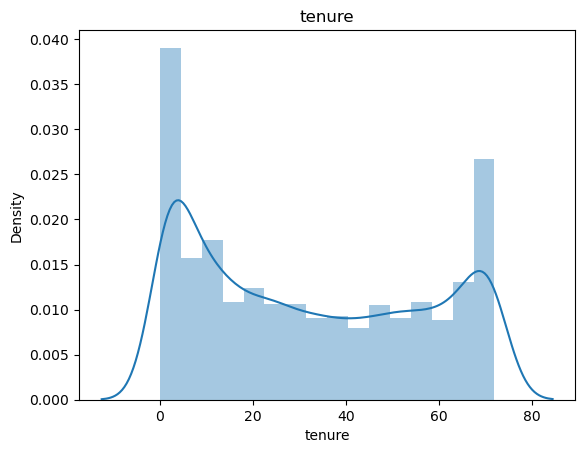

count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
max      118.750
Name: MonthlyCharges, dtype: float64


C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


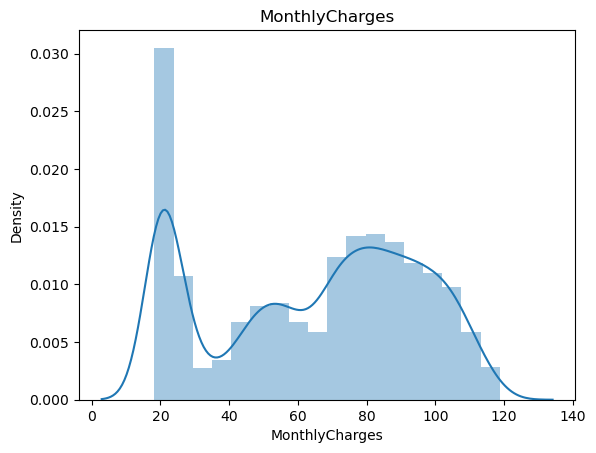

In [14]:
def num_summary(dataframe,num_col,plot=False):
    quantiles = [0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]
    print(dataframe[num_col].describe(quantiles).T)

    if plot:
        #dataframe[num_col].hist()
        sns.distplot(dataframe[num_col])
        plt.xlabel(num_col)
        plt.title(num_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(df, col ,plot=True)

### Korelasyon matrisi oluşturduk ve korelasyonu yüksek olan değişkeni yakaladık.

C:\Users\can\AppData\Local\Temp\ipykernel_8388\1913882594.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))


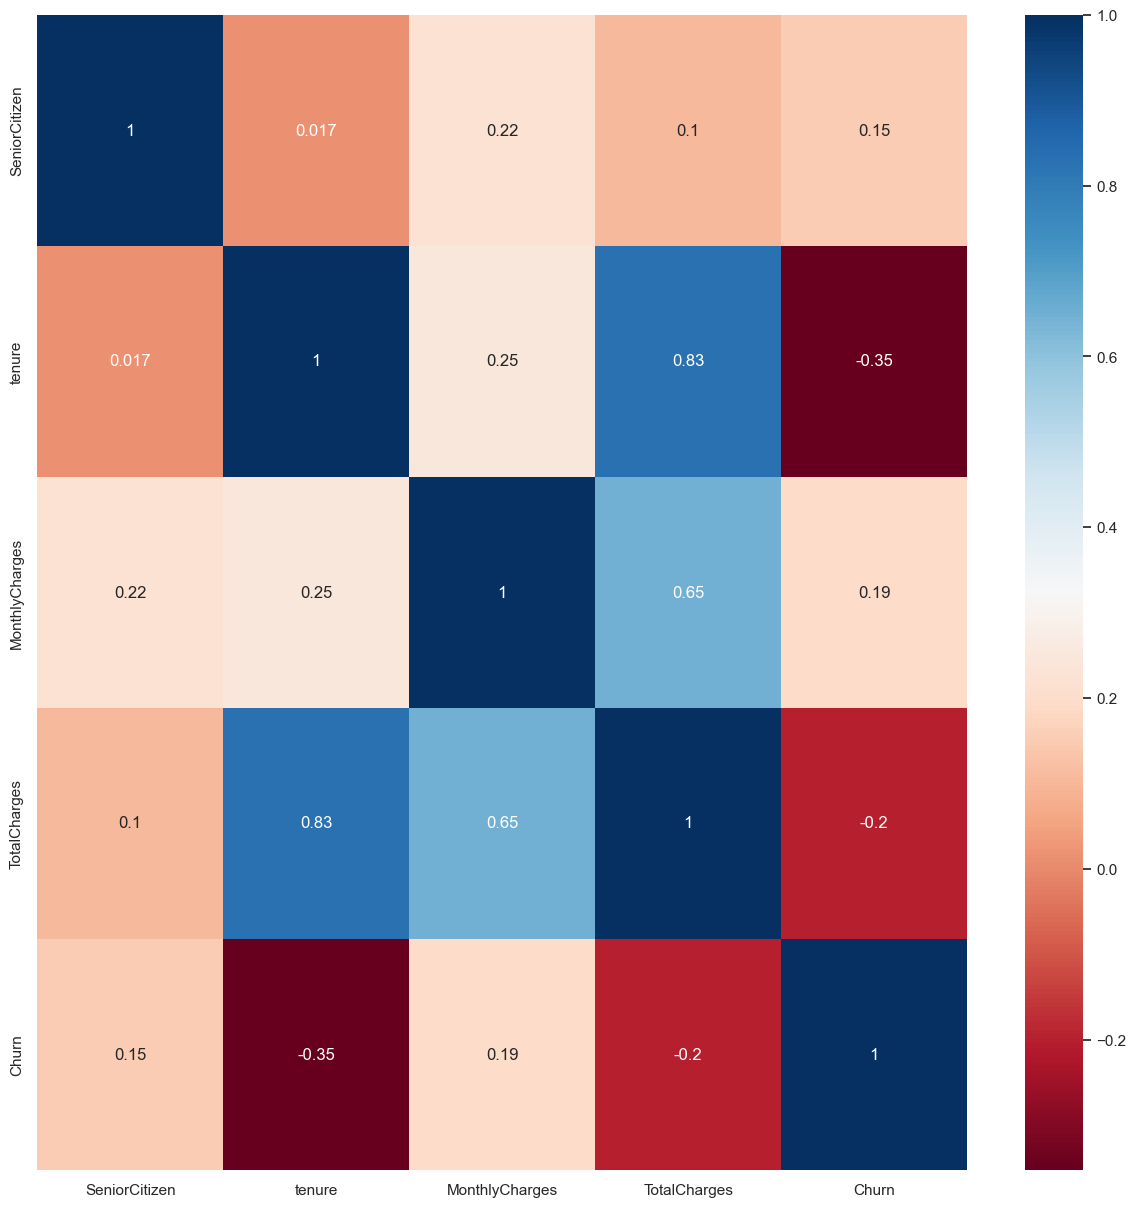

['TotalCharges']

In [15]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.80):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu",annot=True)
        plt.show()
    return drop_list


high_correlated_cols(df, plot=True)

### Eksik değerleri bulduk , gerekli işlemleri yaptık

In [16]:
def missing_values_table(dataframe,na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum()>0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum()/dataframe.shape[0]*100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss,np.round(ratio,2)],axis=1,keys=["n_miss","ratio"])
    print(missing_df,end="\n")
    if na_name:
        return na_columns

missing_values_table(df,na_name=True)


              n_miss  ratio
TotalCharges      11  0.160


['TotalCharges']

C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


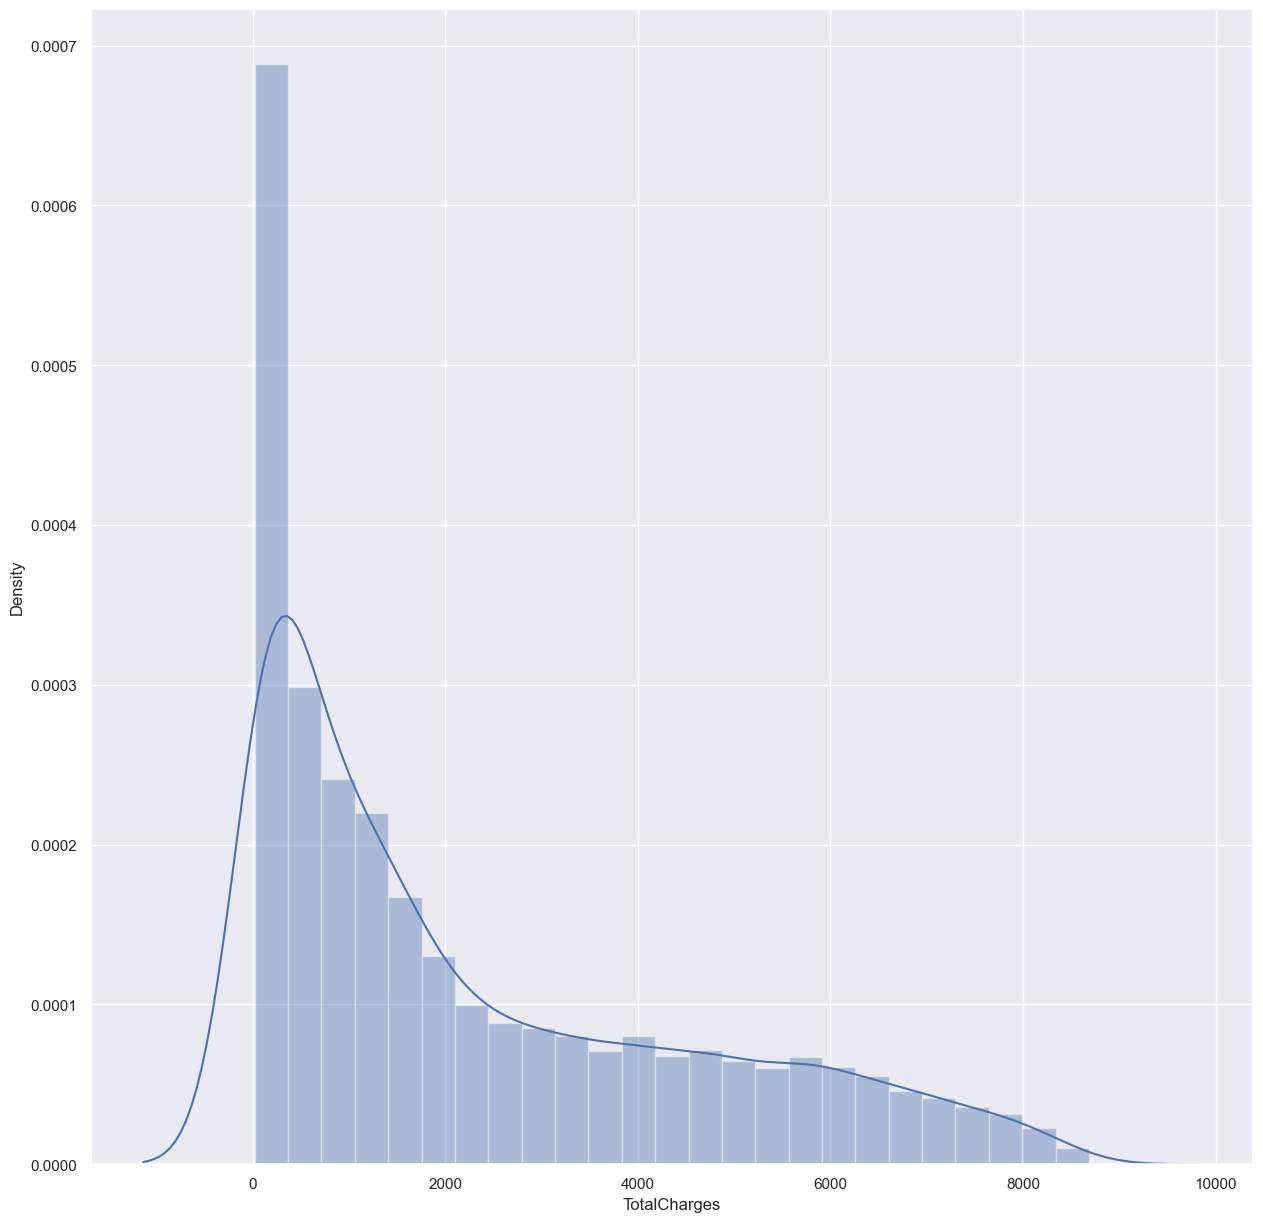

In [17]:
sns.distplot(df["TotalCharges"])
plt.show()

### Total Charges değişkeni sağdan çarpık olduğu için median ile doldurulur.

In [18]:
print("Total Charges mean:" ,df["TotalCharges"].mean() , "\nTotal Charges Median:" , df["TotalCharges"].median())


Total Charges mean: 2283.3004408418697 
Total Charges Median: 1397.475


In [19]:
df["TotalCharges"].fillna(df["TotalCharges"].median(skipna=True), inplace=True)

In [20]:
df.dropna(inplace=True) 

### Aykırı değerlere bakıp baskıladık

In [21]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [22]:
for col in num_cols:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False


### Özellik Mühendisliği

In [23]:
df.loc[(df['tenure'] <= 12), 'CustomerTime'] = '1year'
df.loc[(df['tenure'] > 12) & (df['tenure'] <= 48), 'CustomerTime'] = '4years'
df.loc[(df['tenure'] > 48), 'CustomerTime'] = '4years+'

In [24]:
df.loc[(df['PaymentMethod'] == 'Bank transfer (automatic)') | (df['PaymentMethod'] == 'Credit card (automatic)'), 'PaymentMethod_New'] = 'Bank'
df.loc[(df['PaymentMethod'] == 'Mailed check') | (df['PaymentMethod'] == 'Electronic check'), 'PaymentMethod_New'] = 'Check'

In [25]:
df["LongTermContract"] = df["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)

In [26]:
df.drop('Contract',axis=1,inplace=True)

In [27]:
df.loc[:, "MaxPackageInternet"] = np.where((df["InternetService"] != 'No') & (df["OnlineSecurity"] == 'Yes')
                                               & (df["OnlineBackup"] == 'Yes') & (df["DeviceProtection"] == 'Yes')
                                               & (df["TechSupport"] == 'Yes') & (df["StreamingTV"] == 'Yes') & (df["StreamingMovies"] == 'Yes'), '1','0')

In [28]:
df["noSup"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)


In [29]:
df['TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)

In [30]:
df["AvgPerMonth"] = df["TotalCharges"] / (df["tenure"] + 1)


In [31]:
df["CurrentIncrease"] = df["AvgPerMonth"] / df["MonthlyCharges"]


In [32]:
df["StreamingService"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)


In [33]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes != "O"]
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and df[col].dtypes == "O"]
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]

num_cols = [col for col in df.columns if df[col].dtypes != "O"]
num_cols = [col for col in num_cols if col not in num_but_cat]

cat_cols, num_cols, cat_but_car = cat_cols, num_cols, cat_but_car

### Label Encoder

In [34]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [35]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'PaymentMethod_New',
 'MaxPackageInternet']

In [36]:
for col in binary_cols:
    df = label_encoder(df, col)

In [37]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "TotalServices"]]

### One hot encoding

In [38]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [39]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

### Standartlaştırma

In [40]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].head()

,tenure,MonthlyCharges,TotalCharges,AvgPerMonth,CurrentIncrease
0,-1.277,-1.160,-0.994,-0.758,-0.238
1,0.066,-0.260,-0.173,-0.118,-0.010
2,-1.237,-0.363,-0.960,-0.412,-0.152
3,0.514,-0.747,-0.195,-0.347,-0.011
4,-1.237,0.197,-0.940,-0.174,-0.129


## Modelleme

In [42]:
y = df[["Churn"]]
X = df.drop(["Churn"], axis=1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)


## Model Seçimi

In [44]:
all_models = []

In [45]:
models = [
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('XGB', XGBClassifier()),
          ("LightGBM", LGBMClassifier()),
          ("CatBoost", CatBoostClassifier())]

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "precision", "recall"])
    accuracy = cv_results['test_accuracy'].mean()
    recall = cv_results['test_recall'].mean()
    precision = cv_results['test_precision'].mean()
    f1 = cv_results['test_f1'].mean()
    values = dict(name=name, Accuracy=accuracy, Recall=recall,Precision=precision,F1 = f1 )
    all_models.append(values)
    sort_method = False
    all_models_df = pd.DataFrame(all_models)
    all_models_df = all_models_df.sort_values(all_models_df.columns[1], ascending=sort_method)


C:\Users\can\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\can\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\can\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\can\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed

Learning rate set to 0.022666
0:	learn: 0.6779812	total: 163ms	remaining: 2m 42s
1:	learn: 0.6627699	total: 165ms	remaining: 1m 22s
2:	learn: 0.6490390	total: 168ms	remaining: 55.8s
3:	learn: 0.6359500	total: 178ms	remaining: 44.2s
4:	learn: 0.6235386	total: 180ms	remaining: 35.9s
5:	learn: 0.6116731	total: 183ms	remaining: 30.3s
6:	learn: 0.6007376	total: 186ms	remaining: 26.4s
7:	learn: 0.5916108	total: 188ms	remaining: 23.4s
8:	learn: 0.5827001	total: 191ms	remaining: 21s
9:	learn: 0.5750004	total: 193ms	remaining: 19.1s
10:	learn: 0.5664026	total: 195ms	remaining: 17.6s
11:	learn: 0.5591341	total: 198ms	remaining: 16.3s
12:	learn: 0.5517858	total: 208ms	remaining: 15.8s
13:	learn: 0.5443328	total: 211ms	remaining: 14.9s
14:	learn: 0.5376707	total: 214ms	remaining: 14s
15:	learn: 0.5313099	total: 216ms	remaining: 13.3s
16:	learn: 0.5258785	total: 219ms	remaining: 12.7s
17:	learn: 0.5197302	total: 222ms	remaining: 12.1s
18:	learn: 0.5145829	total: 224ms	remaining: 11.6s
19:	learn: 0.

197:	learn: 0.3852025	total: 1s	remaining: 4.07s
198:	learn: 0.3850335	total: 1.01s	remaining: 4.06s
199:	learn: 0.3848684	total: 1.01s	remaining: 4.05s
200:	learn: 0.3846925	total: 1.01s	remaining: 4.03s
201:	learn: 0.3846193	total: 1.02s	remaining: 4.02s
202:	learn: 0.3845263	total: 1.02s	remaining: 4.01s
203:	learn: 0.3843907	total: 1.02s	remaining: 3.99s
204:	learn: 0.3842916	total: 1.02s	remaining: 3.98s
205:	learn: 0.3840895	total: 1.03s	remaining: 3.96s
206:	learn: 0.3840622	total: 1.03s	remaining: 3.95s
207:	learn: 0.3839147	total: 1.03s	remaining: 3.93s
208:	learn: 0.3836816	total: 1.03s	remaining: 3.92s
209:	learn: 0.3835179	total: 1.05s	remaining: 3.95s
210:	learn: 0.3833858	total: 1.05s	remaining: 3.94s
211:	learn: 0.3832789	total: 1.06s	remaining: 3.93s
212:	learn: 0.3831363	total: 1.06s	remaining: 3.92s
213:	learn: 0.3830110	total: 1.06s	remaining: 3.9s
214:	learn: 0.3828658	total: 1.06s	remaining: 3.89s
215:	learn: 0.3827178	total: 1.07s	remaining: 3.88s
216:	learn: 0.38

392:	learn: 0.3611169	total: 1.84s	remaining: 2.85s
393:	learn: 0.3609500	total: 1.84s	remaining: 2.84s
394:	learn: 0.3608108	total: 1.9s	remaining: 2.92s
395:	learn: 0.3607301	total: 1.91s	remaining: 2.91s
396:	learn: 0.3605969	total: 1.91s	remaining: 2.9s
397:	learn: 0.3604287	total: 1.91s	remaining: 2.89s
398:	learn: 0.3602881	total: 1.92s	remaining: 2.88s
399:	learn: 0.3601500	total: 1.92s	remaining: 2.88s
400:	learn: 0.3600114	total: 1.92s	remaining: 2.87s
401:	learn: 0.3598561	total: 1.92s	remaining: 2.86s
402:	learn: 0.3596732	total: 1.93s	remaining: 2.85s
403:	learn: 0.3595729	total: 1.93s	remaining: 2.84s
404:	learn: 0.3593696	total: 1.93s	remaining: 2.84s
405:	learn: 0.3591557	total: 1.94s	remaining: 2.83s
406:	learn: 0.3589950	total: 1.94s	remaining: 2.82s
407:	learn: 0.3588479	total: 1.94s	remaining: 2.81s
408:	learn: 0.3587611	total: 1.94s	remaining: 2.81s
409:	learn: 0.3586725	total: 1.95s	remaining: 2.8s
410:	learn: 0.3585568	total: 1.95s	remaining: 2.79s
411:	learn: 0.3

622:	learn: 0.3330099	total: 2.66s	remaining: 1.61s
623:	learn: 0.3329064	total: 2.66s	remaining: 1.6s
624:	learn: 0.3327562	total: 2.66s	remaining: 1.6s
625:	learn: 0.3326280	total: 2.67s	remaining: 1.59s
626:	learn: 0.3325249	total: 2.69s	remaining: 1.6s
627:	learn: 0.3324328	total: 2.69s	remaining: 1.59s
628:	learn: 0.3323245	total: 2.69s	remaining: 1.59s
629:	learn: 0.3322276	total: 2.7s	remaining: 1.58s
630:	learn: 0.3321481	total: 2.7s	remaining: 1.58s
631:	learn: 0.3320412	total: 2.7s	remaining: 1.57s
632:	learn: 0.3319417	total: 2.71s	remaining: 1.57s
633:	learn: 0.3318320	total: 2.71s	remaining: 1.56s
634:	learn: 0.3317449	total: 2.71s	remaining: 1.56s
635:	learn: 0.3315940	total: 2.71s	remaining: 1.55s
636:	learn: 0.3315256	total: 2.71s	remaining: 1.55s
637:	learn: 0.3314161	total: 2.72s	remaining: 1.54s
638:	learn: 0.3313274	total: 2.72s	remaining: 1.54s
639:	learn: 0.3312233	total: 2.72s	remaining: 1.53s
640:	learn: 0.3311189	total: 2.73s	remaining: 1.53s
641:	learn: 0.3310

841:	learn: 0.3105035	total: 3.25s	remaining: 610ms
842:	learn: 0.3104379	total: 3.25s	remaining: 606ms
843:	learn: 0.3103698	total: 3.26s	remaining: 602ms
844:	learn: 0.3102622	total: 3.26s	remaining: 598ms
845:	learn: 0.3101887	total: 3.26s	remaining: 594ms
846:	learn: 0.3101033	total: 3.27s	remaining: 590ms
847:	learn: 0.3100096	total: 3.27s	remaining: 586ms
848:	learn: 0.3099192	total: 3.27s	remaining: 582ms
849:	learn: 0.3098119	total: 3.27s	remaining: 578ms
850:	learn: 0.3097621	total: 3.27s	remaining: 574ms
851:	learn: 0.3096742	total: 3.28s	remaining: 569ms
852:	learn: 0.3095401	total: 3.28s	remaining: 565ms
853:	learn: 0.3094347	total: 3.28s	remaining: 561ms
854:	learn: 0.3094059	total: 3.29s	remaining: 557ms
855:	learn: 0.3093476	total: 3.29s	remaining: 553ms
856:	learn: 0.3092557	total: 3.29s	remaining: 549ms
857:	learn: 0.3091345	total: 3.29s	remaining: 545ms
858:	learn: 0.3090477	total: 3.29s	remaining: 541ms
859:	learn: 0.3089812	total: 3.3s	remaining: 537ms
860:	learn: 0

Learning rate set to 0.022666
0:	learn: 0.6781451	total: 1.78ms	remaining: 1.78s
1:	learn: 0.6631361	total: 4.13ms	remaining: 2.06s
2:	learn: 0.6493608	total: 6.6ms	remaining: 2.19s
3:	learn: 0.6362949	total: 8.97ms	remaining: 2.23s
4:	learn: 0.6245778	total: 15ms	remaining: 2.98s
5:	learn: 0.6128137	total: 17.6ms	remaining: 2.91s
6:	learn: 0.6019204	total: 20.1ms	remaining: 2.85s
7:	learn: 0.5931106	total: 22.9ms	remaining: 2.83s
8:	learn: 0.5837229	total: 25.7ms	remaining: 2.83s
9:	learn: 0.5760203	total: 27.3ms	remaining: 2.7s
10:	learn: 0.5676129	total: 29.6ms	remaining: 2.66s
11:	learn: 0.5599452	total: 32ms	remaining: 2.64s
12:	learn: 0.5523746	total: 34.2ms	remaining: 2.6s
13:	learn: 0.5458913	total: 36.4ms	remaining: 2.57s
14:	learn: 0.5395338	total: 38.6ms	remaining: 2.54s
15:	learn: 0.5337577	total: 41.1ms	remaining: 2.53s
16:	learn: 0.5277534	total: 43.5ms	remaining: 2.52s
17:	learn: 0.5218703	total: 45.7ms	remaining: 2.5s
18:	learn: 0.5173488	total: 48ms	remaining: 2.48s
19

194:	learn: 0.3884430	total: 593ms	remaining: 2.45s
195:	learn: 0.3883228	total: 611ms	remaining: 2.5s
196:	learn: 0.3881719	total: 613ms	remaining: 2.5s
197:	learn: 0.3880139	total: 617ms	remaining: 2.5s
198:	learn: 0.3879021	total: 626ms	remaining: 2.52s
199:	learn: 0.3878037	total: 628ms	remaining: 2.51s
200:	learn: 0.3877005	total: 631ms	remaining: 2.51s
201:	learn: 0.3875498	total: 633ms	remaining: 2.5s
202:	learn: 0.3873587	total: 636ms	remaining: 2.5s
203:	learn: 0.3872267	total: 638ms	remaining: 2.49s
204:	learn: 0.3870952	total: 641ms	remaining: 2.49s
205:	learn: 0.3869752	total: 644ms	remaining: 2.48s
206:	learn: 0.3868528	total: 646ms	remaining: 2.48s
207:	learn: 0.3866857	total: 649ms	remaining: 2.47s
208:	learn: 0.3865480	total: 673ms	remaining: 2.55s
209:	learn: 0.3863908	total: 676ms	remaining: 2.54s
210:	learn: 0.3862580	total: 678ms	remaining: 2.54s
211:	learn: 0.3860748	total: 681ms	remaining: 2.53s
212:	learn: 0.3859141	total: 683ms	remaining: 2.52s
213:	learn: 0.385

373:	learn: 0.3654390	total: 1.21s	remaining: 2.03s
374:	learn: 0.3652939	total: 1.22s	remaining: 2.03s
375:	learn: 0.3651830	total: 1.22s	remaining: 2.02s
376:	learn: 0.3651162	total: 1.22s	remaining: 2.02s
377:	learn: 0.3650488	total: 1.23s	remaining: 2.02s
378:	learn: 0.3649003	total: 1.23s	remaining: 2.01s
379:	learn: 0.3647291	total: 1.23s	remaining: 2.01s
380:	learn: 0.3645520	total: 1.23s	remaining: 2s
381:	learn: 0.3644893	total: 1.24s	remaining: 2s
382:	learn: 0.3643944	total: 1.24s	remaining: 1.99s
383:	learn: 0.3643238	total: 1.24s	remaining: 1.99s
384:	learn: 0.3642612	total: 1.24s	remaining: 1.99s
385:	learn: 0.3641417	total: 1.25s	remaining: 1.98s
386:	learn: 0.3639823	total: 1.25s	remaining: 1.98s
387:	learn: 0.3637812	total: 1.25s	remaining: 1.97s
388:	learn: 0.3636728	total: 1.25s	remaining: 1.97s
389:	learn: 0.3635957	total: 1.26s	remaining: 1.97s
390:	learn: 0.3634968	total: 1.26s	remaining: 1.96s
391:	learn: 0.3632677	total: 1.26s	remaining: 1.96s
392:	learn: 0.3631

568:	learn: 0.3423796	total: 1.81s	remaining: 1.37s
569:	learn: 0.3422289	total: 1.81s	remaining: 1.36s
570:	learn: 0.3421594	total: 1.81s	remaining: 1.36s
571:	learn: 0.3420733	total: 1.81s	remaining: 1.36s
572:	learn: 0.3419948	total: 1.82s	remaining: 1.35s
573:	learn: 0.3418019	total: 1.82s	remaining: 1.35s
574:	learn: 0.3417571	total: 1.82s	remaining: 1.35s
575:	learn: 0.3416108	total: 1.83s	remaining: 1.34s
576:	learn: 0.3415562	total: 1.83s	remaining: 1.34s
577:	learn: 0.3414092	total: 1.83s	remaining: 1.34s
578:	learn: 0.3413115	total: 1.83s	remaining: 1.33s
579:	learn: 0.3412472	total: 1.84s	remaining: 1.33s
580:	learn: 0.3411587	total: 1.84s	remaining: 1.33s
581:	learn: 0.3410939	total: 1.84s	remaining: 1.32s
582:	learn: 0.3409884	total: 1.85s	remaining: 1.32s
583:	learn: 0.3409123	total: 1.85s	remaining: 1.32s
584:	learn: 0.3407977	total: 1.85s	remaining: 1.31s
585:	learn: 0.3406519	total: 1.85s	remaining: 1.31s
586:	learn: 0.3405069	total: 1.86s	remaining: 1.31s
587:	learn: 

766:	learn: 0.3219233	total: 2.43s	remaining: 739ms
767:	learn: 0.3218229	total: 2.43s	remaining: 735ms
768:	learn: 0.3216487	total: 2.44s	remaining: 732ms
769:	learn: 0.3215659	total: 2.44s	remaining: 728ms
770:	learn: 0.3214859	total: 2.44s	remaining: 725ms
771:	learn: 0.3213826	total: 2.44s	remaining: 722ms
772:	learn: 0.3213092	total: 2.44s	remaining: 718ms
773:	learn: 0.3211926	total: 2.45s	remaining: 715ms
774:	learn: 0.3211428	total: 2.45s	remaining: 711ms
775:	learn: 0.3209777	total: 2.45s	remaining: 708ms
776:	learn: 0.3208543	total: 2.46s	remaining: 705ms
777:	learn: 0.3207474	total: 2.46s	remaining: 701ms
778:	learn: 0.3206821	total: 2.46s	remaining: 698ms
779:	learn: 0.3205580	total: 2.46s	remaining: 695ms
780:	learn: 0.3204345	total: 2.46s	remaining: 691ms
781:	learn: 0.3203491	total: 2.47s	remaining: 688ms
782:	learn: 0.3202707	total: 2.47s	remaining: 685ms
783:	learn: 0.3202149	total: 2.47s	remaining: 681ms
784:	learn: 0.3201664	total: 2.47s	remaining: 678ms
785:	learn: 

958:	learn: 0.3033998	total: 3.04s	remaining: 130ms
959:	learn: 0.3033341	total: 3.04s	remaining: 127ms
960:	learn: 0.3032092	total: 3.04s	remaining: 123ms
961:	learn: 0.3031041	total: 3.04s	remaining: 120ms
962:	learn: 0.3029949	total: 3.05s	remaining: 117ms
963:	learn: 0.3029064	total: 3.05s	remaining: 114ms
964:	learn: 0.3027743	total: 3.05s	remaining: 111ms
965:	learn: 0.3026771	total: 3.05s	remaining: 108ms
966:	learn: 0.3025424	total: 3.06s	remaining: 104ms
967:	learn: 0.3024491	total: 3.06s	remaining: 101ms
968:	learn: 0.3023497	total: 3.06s	remaining: 98ms
969:	learn: 0.3022795	total: 3.06s	remaining: 94.8ms
970:	learn: 0.3022117	total: 3.07s	remaining: 91.6ms
971:	learn: 0.3021192	total: 3.07s	remaining: 88.4ms
972:	learn: 0.3020393	total: 3.07s	remaining: 85.3ms
973:	learn: 0.3019480	total: 3.08s	remaining: 82.1ms
974:	learn: 0.3018336	total: 3.08s	remaining: 78.9ms
975:	learn: 0.3017084	total: 3.08s	remaining: 75.7ms
976:	learn: 0.3015624	total: 3.08s	remaining: 72.6ms
977:	

163:	learn: 0.3903736	total: 468ms	remaining: 2.38s
164:	learn: 0.3902449	total: 470ms	remaining: 2.38s
165:	learn: 0.3900746	total: 473ms	remaining: 2.38s
166:	learn: 0.3899184	total: 475ms	remaining: 2.37s
167:	learn: 0.3898134	total: 478ms	remaining: 2.37s
168:	learn: 0.3895618	total: 481ms	remaining: 2.36s
169:	learn: 0.3893760	total: 483ms	remaining: 2.36s
170:	learn: 0.3892368	total: 486ms	remaining: 2.35s
171:	learn: 0.3890123	total: 488ms	remaining: 2.35s
172:	learn: 0.3888716	total: 491ms	remaining: 2.35s
173:	learn: 0.3887210	total: 494ms	remaining: 2.34s
174:	learn: 0.3885910	total: 496ms	remaining: 2.34s
175:	learn: 0.3883888	total: 499ms	remaining: 2.33s
176:	learn: 0.3881837	total: 501ms	remaining: 2.33s
177:	learn: 0.3879225	total: 504ms	remaining: 2.33s
178:	learn: 0.3878229	total: 506ms	remaining: 2.32s
179:	learn: 0.3877142	total: 508ms	remaining: 2.32s
180:	learn: 0.3875335	total: 511ms	remaining: 2.31s
181:	learn: 0.3873383	total: 513ms	remaining: 2.31s
182:	learn: 

327:	learn: 0.3680256	total: 860ms	remaining: 1.76s
328:	learn: 0.3678856	total: 862ms	remaining: 1.76s
329:	learn: 0.3677177	total: 864ms	remaining: 1.75s
330:	learn: 0.3676183	total: 867ms	remaining: 1.75s
331:	learn: 0.3675234	total: 869ms	remaining: 1.75s
332:	learn: 0.3673987	total: 871ms	remaining: 1.74s
333:	learn: 0.3672897	total: 873ms	remaining: 1.74s
334:	learn: 0.3671332	total: 876ms	remaining: 1.74s
335:	learn: 0.3670182	total: 878ms	remaining: 1.73s
336:	learn: 0.3668866	total: 880ms	remaining: 1.73s
337:	learn: 0.3667700	total: 882ms	remaining: 1.73s
338:	learn: 0.3666926	total: 885ms	remaining: 1.72s
339:	learn: 0.3664977	total: 887ms	remaining: 1.72s
340:	learn: 0.3664563	total: 889ms	remaining: 1.72s
341:	learn: 0.3663736	total: 891ms	remaining: 1.71s
342:	learn: 0.3663226	total: 894ms	remaining: 1.71s
343:	learn: 0.3662216	total: 896ms	remaining: 1.71s
344:	learn: 0.3660785	total: 898ms	remaining: 1.7s
345:	learn: 0.3659261	total: 900ms	remaining: 1.7s
346:	learn: 0.

494:	learn: 0.3481964	total: 1.26s	remaining: 1.28s
495:	learn: 0.3480627	total: 1.26s	remaining: 1.28s
496:	learn: 0.3479226	total: 1.26s	remaining: 1.28s
497:	learn: 0.3478343	total: 1.26s	remaining: 1.27s
498:	learn: 0.3477435	total: 1.27s	remaining: 1.27s
499:	learn: 0.3476640	total: 1.27s	remaining: 1.27s
500:	learn: 0.3475184	total: 1.27s	remaining: 1.27s
501:	learn: 0.3473055	total: 1.27s	remaining: 1.26s
502:	learn: 0.3472385	total: 1.28s	remaining: 1.26s
503:	learn: 0.3471005	total: 1.28s	remaining: 1.26s
504:	learn: 0.3469418	total: 1.28s	remaining: 1.26s
505:	learn: 0.3468358	total: 1.28s	remaining: 1.25s
506:	learn: 0.3466823	total: 1.29s	remaining: 1.25s
507:	learn: 0.3465868	total: 1.29s	remaining: 1.25s
508:	learn: 0.3464976	total: 1.29s	remaining: 1.25s
509:	learn: 0.3463866	total: 1.29s	remaining: 1.24s
510:	learn: 0.3462703	total: 1.29s	remaining: 1.24s
511:	learn: 0.3461824	total: 1.3s	remaining: 1.24s
512:	learn: 0.3460881	total: 1.3s	remaining: 1.23s
513:	learn: 0.

730:	learn: 0.3211112	total: 1.85s	remaining: 682ms
731:	learn: 0.3210151	total: 1.86s	remaining: 680ms
732:	learn: 0.3208552	total: 1.86s	remaining: 677ms
733:	learn: 0.3207373	total: 1.86s	remaining: 675ms
734:	learn: 0.3206697	total: 1.86s	remaining: 672ms
735:	learn: 0.3205570	total: 1.87s	remaining: 670ms
736:	learn: 0.3204864	total: 1.87s	remaining: 667ms
737:	learn: 0.3204057	total: 1.87s	remaining: 665ms
738:	learn: 0.3203124	total: 1.87s	remaining: 662ms
739:	learn: 0.3202402	total: 1.88s	remaining: 660ms
740:	learn: 0.3201682	total: 1.88s	remaining: 657ms
741:	learn: 0.3200545	total: 1.88s	remaining: 654ms
742:	learn: 0.3199875	total: 1.88s	remaining: 652ms
743:	learn: 0.3198718	total: 1.89s	remaining: 649ms
744:	learn: 0.3197919	total: 1.89s	remaining: 647ms
745:	learn: 0.3196834	total: 1.89s	remaining: 644ms
746:	learn: 0.3195994	total: 1.89s	remaining: 642ms
747:	learn: 0.3195430	total: 1.9s	remaining: 639ms
748:	learn: 0.3194420	total: 1.9s	remaining: 636ms
749:	learn: 0.

896:	learn: 0.3050189	total: 2.26s	remaining: 259ms
897:	learn: 0.3049263	total: 2.26s	remaining: 257ms
898:	learn: 0.3048593	total: 2.26s	remaining: 254ms
899:	learn: 0.3047302	total: 2.26s	remaining: 252ms
900:	learn: 0.3046157	total: 2.27s	remaining: 249ms
901:	learn: 0.3045386	total: 2.27s	remaining: 246ms
902:	learn: 0.3044650	total: 2.27s	remaining: 244ms
903:	learn: 0.3044135	total: 2.27s	remaining: 241ms
904:	learn: 0.3043082	total: 2.27s	remaining: 239ms
905:	learn: 0.3041811	total: 2.28s	remaining: 236ms
906:	learn: 0.3040961	total: 2.28s	remaining: 234ms
907:	learn: 0.3039972	total: 2.28s	remaining: 231ms
908:	learn: 0.3039376	total: 2.28s	remaining: 229ms
909:	learn: 0.3038139	total: 2.29s	remaining: 226ms
910:	learn: 0.3037331	total: 2.29s	remaining: 224ms
911:	learn: 0.3036633	total: 2.29s	remaining: 221ms
912:	learn: 0.3035461	total: 2.3s	remaining: 219ms
913:	learn: 0.3034592	total: 2.3s	remaining: 216ms
914:	learn: 0.3033560	total: 2.3s	remaining: 214ms
915:	learn: 0.3

63:	learn: 0.4239949	total: 142ms	remaining: 2.08s
64:	learn: 0.4232415	total: 145ms	remaining: 2.08s
65:	learn: 0.4225138	total: 147ms	remaining: 2.08s
66:	learn: 0.4218352	total: 149ms	remaining: 2.08s
67:	learn: 0.4212645	total: 152ms	remaining: 2.08s
68:	learn: 0.4207753	total: 154ms	remaining: 2.08s
69:	learn: 0.4202755	total: 156ms	remaining: 2.07s
70:	learn: 0.4197726	total: 158ms	remaining: 2.07s
71:	learn: 0.4193802	total: 161ms	remaining: 2.07s
72:	learn: 0.4187770	total: 163ms	remaining: 2.07s
73:	learn: 0.4181730	total: 165ms	remaining: 2.06s
74:	learn: 0.4174807	total: 167ms	remaining: 2.06s
75:	learn: 0.4169165	total: 169ms	remaining: 2.06s
76:	learn: 0.4163539	total: 172ms	remaining: 2.06s
77:	learn: 0.4156787	total: 174ms	remaining: 2.06s
78:	learn: 0.4150688	total: 176ms	remaining: 2.06s
79:	learn: 0.4146272	total: 179ms	remaining: 2.05s
80:	learn: 0.4142056	total: 181ms	remaining: 2.05s
81:	learn: 0.4137789	total: 183ms	remaining: 2.05s
82:	learn: 0.4133534	total: 185

295:	learn: 0.3729229	total: 742ms	remaining: 1.76s
296:	learn: 0.3728157	total: 744ms	remaining: 1.76s
297:	learn: 0.3727416	total: 747ms	remaining: 1.76s
298:	learn: 0.3726177	total: 759ms	remaining: 1.78s
299:	learn: 0.3724680	total: 762ms	remaining: 1.78s
300:	learn: 0.3723357	total: 764ms	remaining: 1.77s
301:	learn: 0.3722640	total: 766ms	remaining: 1.77s
302:	learn: 0.3720786	total: 768ms	remaining: 1.77s
303:	learn: 0.3719687	total: 770ms	remaining: 1.76s
304:	learn: 0.3718390	total: 776ms	remaining: 1.77s
305:	learn: 0.3717707	total: 778ms	remaining: 1.76s
306:	learn: 0.3715872	total: 780ms	remaining: 1.76s
307:	learn: 0.3714724	total: 782ms	remaining: 1.76s
308:	learn: 0.3713778	total: 784ms	remaining: 1.75s
309:	learn: 0.3712633	total: 786ms	remaining: 1.75s
310:	learn: 0.3711164	total: 789ms	remaining: 1.75s
311:	learn: 0.3710057	total: 791ms	remaining: 1.74s
312:	learn: 0.3709287	total: 793ms	remaining: 1.74s
313:	learn: 0.3707928	total: 795ms	remaining: 1.74s
314:	learn: 

501:	learn: 0.3466529	total: 1.35s	remaining: 1.34s
502:	learn: 0.3465341	total: 1.36s	remaining: 1.35s
503:	learn: 0.3463837	total: 1.37s	remaining: 1.35s
504:	learn: 0.3462668	total: 1.37s	remaining: 1.34s
505:	learn: 0.3461767	total: 1.37s	remaining: 1.34s
506:	learn: 0.3460395	total: 1.38s	remaining: 1.34s
507:	learn: 0.3459860	total: 1.38s	remaining: 1.33s
508:	learn: 0.3458235	total: 1.38s	remaining: 1.33s
509:	learn: 0.3456650	total: 1.38s	remaining: 1.33s
510:	learn: 0.3455751	total: 1.39s	remaining: 1.33s
511:	learn: 0.3454072	total: 1.39s	remaining: 1.32s
512:	learn: 0.3452689	total: 1.39s	remaining: 1.32s
513:	learn: 0.3451821	total: 1.39s	remaining: 1.32s
514:	learn: 0.3450874	total: 1.4s	remaining: 1.31s
515:	learn: 0.3449817	total: 1.4s	remaining: 1.31s
516:	learn: 0.3448746	total: 1.4s	remaining: 1.31s
517:	learn: 0.3446946	total: 1.4s	remaining: 1.3s
518:	learn: 0.3445922	total: 1.41s	remaining: 1.3s
519:	learn: 0.3444817	total: 1.41s	remaining: 1.3s
520:	learn: 0.34435

704:	learn: 0.3247441	total: 1.95s	remaining: 814ms
705:	learn: 0.3246000	total: 1.95s	remaining: 811ms
706:	learn: 0.3244310	total: 1.95s	remaining: 808ms
707:	learn: 0.3243797	total: 1.95s	remaining: 805ms
708:	learn: 0.3242558	total: 1.95s	remaining: 802ms
709:	learn: 0.3241883	total: 1.96s	remaining: 799ms
710:	learn: 0.3240755	total: 1.96s	remaining: 796ms
711:	learn: 0.3239779	total: 1.96s	remaining: 793ms
712:	learn: 0.3238437	total: 1.96s	remaining: 790ms
713:	learn: 0.3237482	total: 1.97s	remaining: 788ms
714:	learn: 0.3236814	total: 1.97s	remaining: 785ms
715:	learn: 0.3235716	total: 1.97s	remaining: 782ms
716:	learn: 0.3234503	total: 1.97s	remaining: 779ms
717:	learn: 0.3233429	total: 1.98s	remaining: 776ms
718:	learn: 0.3231922	total: 1.98s	remaining: 773ms
719:	learn: 0.3231033	total: 1.98s	remaining: 770ms
720:	learn: 0.3229885	total: 1.98s	remaining: 767ms
721:	learn: 0.3229090	total: 1.98s	remaining: 764ms
722:	learn: 0.3228374	total: 1.99s	remaining: 761ms
723:	learn: 

873:	learn: 0.3086722	total: 2.35s	remaining: 339ms
874:	learn: 0.3085378	total: 2.35s	remaining: 336ms
875:	learn: 0.3084387	total: 2.35s	remaining: 333ms
876:	learn: 0.3083089	total: 2.36s	remaining: 330ms
877:	learn: 0.3081786	total: 2.36s	remaining: 328ms
878:	learn: 0.3081059	total: 2.36s	remaining: 325ms
879:	learn: 0.3080754	total: 2.36s	remaining: 322ms
880:	learn: 0.3079713	total: 2.37s	remaining: 319ms
881:	learn: 0.3078445	total: 2.37s	remaining: 317ms
882:	learn: 0.3077678	total: 2.37s	remaining: 314ms
883:	learn: 0.3077376	total: 2.37s	remaining: 311ms
884:	learn: 0.3076252	total: 2.37s	remaining: 309ms
885:	learn: 0.3074611	total: 2.38s	remaining: 306ms
886:	learn: 0.3073351	total: 2.38s	remaining: 303ms
887:	learn: 0.3072968	total: 2.38s	remaining: 300ms
888:	learn: 0.3071448	total: 2.38s	remaining: 298ms
889:	learn: 0.3070462	total: 2.39s	remaining: 295ms
890:	learn: 0.3070053	total: 2.39s	remaining: 292ms
891:	learn: 0.3069250	total: 2.39s	remaining: 290ms
892:	learn: 

76:	learn: 0.4157632	total: 241ms	remaining: 2.89s
77:	learn: 0.4152024	total: 244ms	remaining: 2.88s
78:	learn: 0.4148083	total: 246ms	remaining: 2.87s
79:	learn: 0.4143275	total: 249ms	remaining: 2.86s
80:	learn: 0.4140506	total: 251ms	remaining: 2.85s
81:	learn: 0.4135639	total: 254ms	remaining: 2.85s
82:	learn: 0.4129762	total: 257ms	remaining: 2.84s
83:	learn: 0.4124775	total: 260ms	remaining: 2.84s
84:	learn: 0.4120271	total: 263ms	remaining: 2.83s
85:	learn: 0.4114527	total: 265ms	remaining: 2.82s
86:	learn: 0.4110154	total: 268ms	remaining: 2.81s
87:	learn: 0.4107175	total: 270ms	remaining: 2.8s
88:	learn: 0.4103245	total: 289ms	remaining: 2.96s
89:	learn: 0.4099987	total: 291ms	remaining: 2.95s
90:	learn: 0.4095420	total: 294ms	remaining: 2.94s
91:	learn: 0.4091426	total: 296ms	remaining: 2.92s
92:	learn: 0.4087147	total: 299ms	remaining: 2.92s
93:	learn: 0.4082711	total: 301ms	remaining: 2.9s
94:	learn: 0.4080316	total: 303ms	remaining: 2.89s
95:	learn: 0.4077149	total: 306ms

301:	learn: 0.3721996	total: 840ms	remaining: 1.94s
302:	learn: 0.3721393	total: 842ms	remaining: 1.94s
303:	learn: 0.3720659	total: 844ms	remaining: 1.93s
304:	learn: 0.3719278	total: 847ms	remaining: 1.93s
305:	learn: 0.3717954	total: 849ms	remaining: 1.93s
306:	learn: 0.3716974	total: 851ms	remaining: 1.92s
307:	learn: 0.3714807	total: 853ms	remaining: 1.92s
308:	learn: 0.3713996	total: 856ms	remaining: 1.91s
309:	learn: 0.3713210	total: 858ms	remaining: 1.91s
310:	learn: 0.3710782	total: 861ms	remaining: 1.91s
311:	learn: 0.3709860	total: 871ms	remaining: 1.92s
312:	learn: 0.3708672	total: 873ms	remaining: 1.92s
313:	learn: 0.3707380	total: 875ms	remaining: 1.91s
314:	learn: 0.3706665	total: 877ms	remaining: 1.91s
315:	learn: 0.3706291	total: 879ms	remaining: 1.9s
316:	learn: 0.3704926	total: 881ms	remaining: 1.9s
317:	learn: 0.3703669	total: 884ms	remaining: 1.89s
318:	learn: 0.3702041	total: 886ms	remaining: 1.89s
319:	learn: 0.3700266	total: 888ms	remaining: 1.89s
320:	learn: 0.

471:	learn: 0.3501140	total: 1.24s	remaining: 1.38s
472:	learn: 0.3499656	total: 1.24s	remaining: 1.38s
473:	learn: 0.3498254	total: 1.24s	remaining: 1.38s
474:	learn: 0.3496753	total: 1.24s	remaining: 1.37s
475:	learn: 0.3495428	total: 1.25s	remaining: 1.37s
476:	learn: 0.3494225	total: 1.25s	remaining: 1.37s
477:	learn: 0.3493497	total: 1.25s	remaining: 1.36s
478:	learn: 0.3492807	total: 1.25s	remaining: 1.36s
479:	learn: 0.3491969	total: 1.25s	remaining: 1.36s
480:	learn: 0.3490273	total: 1.26s	remaining: 1.36s
481:	learn: 0.3488992	total: 1.26s	remaining: 1.35s
482:	learn: 0.3487632	total: 1.26s	remaining: 1.35s
483:	learn: 0.3486406	total: 1.26s	remaining: 1.35s
484:	learn: 0.3485394	total: 1.27s	remaining: 1.34s
485:	learn: 0.3484907	total: 1.27s	remaining: 1.34s
486:	learn: 0.3484287	total: 1.27s	remaining: 1.34s
487:	learn: 0.3482761	total: 1.27s	remaining: 1.34s
488:	learn: 0.3480487	total: 1.27s	remaining: 1.33s
489:	learn: 0.3478652	total: 1.28s	remaining: 1.33s
490:	learn: 

656:	learn: 0.3281339	total: 1.64s	remaining: 857ms
657:	learn: 0.3280683	total: 1.64s	remaining: 854ms
658:	learn: 0.3279596	total: 1.65s	remaining: 851ms
659:	learn: 0.3278211	total: 1.65s	remaining: 849ms
660:	learn: 0.3277574	total: 1.65s	remaining: 846ms
661:	learn: 0.3276248	total: 1.65s	remaining: 843ms
662:	learn: 0.3275010	total: 1.65s	remaining: 841ms
663:	learn: 0.3274395	total: 1.66s	remaining: 838ms
664:	learn: 0.3272852	total: 1.66s	remaining: 835ms
665:	learn: 0.3272054	total: 1.66s	remaining: 832ms
666:	learn: 0.3270409	total: 1.66s	remaining: 830ms
667:	learn: 0.3269311	total: 1.66s	remaining: 827ms
668:	learn: 0.3267934	total: 1.67s	remaining: 824ms
669:	learn: 0.3266748	total: 1.67s	remaining: 822ms
670:	learn: 0.3265446	total: 1.67s	remaining: 819ms
671:	learn: 0.3264882	total: 1.67s	remaining: 816ms
672:	learn: 0.3263490	total: 1.67s	remaining: 814ms
673:	learn: 0.3262365	total: 1.68s	remaining: 811ms
674:	learn: 0.3261437	total: 1.68s	remaining: 808ms
675:	learn: 

849:	learn: 0.3075368	total: 2.06s	remaining: 364ms
850:	learn: 0.3074594	total: 2.06s	remaining: 361ms
851:	learn: 0.3074063	total: 2.06s	remaining: 359ms
852:	learn: 0.3073083	total: 2.07s	remaining: 356ms
853:	learn: 0.3072591	total: 2.07s	remaining: 354ms
854:	learn: 0.3071862	total: 2.07s	remaining: 351ms
855:	learn: 0.3070736	total: 2.07s	remaining: 349ms
856:	learn: 0.3069641	total: 2.08s	remaining: 347ms
857:	learn: 0.3068959	total: 2.08s	remaining: 344ms
858:	learn: 0.3067797	total: 2.08s	remaining: 342ms
859:	learn: 0.3066588	total: 2.08s	remaining: 339ms
860:	learn: 0.3065706	total: 2.08s	remaining: 337ms
861:	learn: 0.3064598	total: 2.09s	remaining: 334ms
862:	learn: 0.3063159	total: 2.09s	remaining: 332ms
863:	learn: 0.3062241	total: 2.09s	remaining: 329ms
864:	learn: 0.3060815	total: 2.09s	remaining: 327ms
865:	learn: 0.3060292	total: 2.1s	remaining: 324ms
866:	learn: 0.3059793	total: 2.1s	remaining: 322ms
867:	learn: 0.3058498	total: 2.1s	remaining: 320ms
868:	learn: 0.3

53:	learn: 0.4283795	total: 206ms	remaining: 3.6s
54:	learn: 0.4273750	total: 208ms	remaining: 3.57s
55:	learn: 0.4263127	total: 210ms	remaining: 3.54s
56:	learn: 0.4254198	total: 212ms	remaining: 3.51s
57:	learn: 0.4245821	total: 214ms	remaining: 3.48s
58:	learn: 0.4236998	total: 216ms	remaining: 3.45s
59:	learn: 0.4226516	total: 218ms	remaining: 3.42s
60:	learn: 0.4217260	total: 220ms	remaining: 3.39s
61:	learn: 0.4209026	total: 223ms	remaining: 3.37s
62:	learn: 0.4201531	total: 225ms	remaining: 3.34s
63:	learn: 0.4194170	total: 227ms	remaining: 3.31s
64:	learn: 0.4186828	total: 229ms	remaining: 3.29s
65:	learn: 0.4179781	total: 231ms	remaining: 3.27s
66:	learn: 0.4172634	total: 233ms	remaining: 3.24s
67:	learn: 0.4165690	total: 235ms	remaining: 3.22s
68:	learn: 0.4159402	total: 237ms	remaining: 3.2s
69:	learn: 0.4152275	total: 239ms	remaining: 3.18s
70:	learn: 0.4147085	total: 241ms	remaining: 3.16s
71:	learn: 0.4140423	total: 243ms	remaining: 3.14s
72:	learn: 0.4134466	total: 245ms

222:	learn: 0.3782824	total: 619ms	remaining: 2.16s
223:	learn: 0.3782312	total: 622ms	remaining: 2.15s
224:	learn: 0.3781122	total: 624ms	remaining: 2.15s
225:	learn: 0.3779556	total: 626ms	remaining: 2.14s
226:	learn: 0.3778070	total: 628ms	remaining: 2.14s
227:	learn: 0.3776852	total: 630ms	remaining: 2.13s
228:	learn: 0.3775603	total: 633ms	remaining: 2.13s
229:	learn: 0.3774255	total: 635ms	remaining: 2.13s
230:	learn: 0.3773083	total: 637ms	remaining: 2.12s
231:	learn: 0.3770649	total: 639ms	remaining: 2.12s
232:	learn: 0.3768384	total: 641ms	remaining: 2.11s
233:	learn: 0.3765935	total: 643ms	remaining: 2.11s
234:	learn: 0.3765352	total: 645ms	remaining: 2.1s
235:	learn: 0.3763426	total: 648ms	remaining: 2.1s
236:	learn: 0.3761617	total: 650ms	remaining: 2.09s
237:	learn: 0.3760474	total: 652ms	remaining: 2.09s
238:	learn: 0.3759432	total: 654ms	remaining: 2.08s
239:	learn: 0.3758545	total: 667ms	remaining: 2.11s
240:	learn: 0.3757463	total: 683ms	remaining: 2.15s
241:	learn: 0.

398:	learn: 0.3555872	total: 1.02s	remaining: 1.53s
399:	learn: 0.3554668	total: 1.02s	remaining: 1.53s
400:	learn: 0.3553337	total: 1.02s	remaining: 1.53s
401:	learn: 0.3551860	total: 1.02s	remaining: 1.52s
402:	learn: 0.3550388	total: 1.03s	remaining: 1.52s
403:	learn: 0.3548896	total: 1.03s	remaining: 1.52s
404:	learn: 0.3547687	total: 1.03s	remaining: 1.51s
405:	learn: 0.3546277	total: 1.03s	remaining: 1.51s
406:	learn: 0.3545403	total: 1.03s	remaining: 1.51s
407:	learn: 0.3543373	total: 1.04s	remaining: 1.5s
408:	learn: 0.3541179	total: 1.04s	remaining: 1.5s
409:	learn: 0.3539410	total: 1.04s	remaining: 1.5s
410:	learn: 0.3537621	total: 1.04s	remaining: 1.5s
411:	learn: 0.3536150	total: 1.05s	remaining: 1.49s
412:	learn: 0.3535221	total: 1.05s	remaining: 1.49s
413:	learn: 0.3534118	total: 1.05s	remaining: 1.49s
414:	learn: 0.3532293	total: 1.05s	remaining: 1.49s
415:	learn: 0.3531187	total: 1.06s	remaining: 1.48s
416:	learn: 0.3530256	total: 1.06s	remaining: 1.48s
417:	learn: 0.35

575:	learn: 0.3328390	total: 1.41s	remaining: 1.04s
576:	learn: 0.3326906	total: 1.42s	remaining: 1.04s
577:	learn: 0.3326004	total: 1.42s	remaining: 1.03s
578:	learn: 0.3325359	total: 1.42s	remaining: 1.03s
579:	learn: 0.3324120	total: 1.42s	remaining: 1.03s
580:	learn: 0.3322533	total: 1.43s	remaining: 1.03s
581:	learn: 0.3321141	total: 1.43s	remaining: 1.02s
582:	learn: 0.3320279	total: 1.43s	remaining: 1.02s
583:	learn: 0.3319011	total: 1.43s	remaining: 1.02s
584:	learn: 0.3318545	total: 1.43s	remaining: 1.02s
585:	learn: 0.3317448	total: 1.44s	remaining: 1.01s
586:	learn: 0.3316399	total: 1.44s	remaining: 1.01s
587:	learn: 0.3315155	total: 1.44s	remaining: 1.01s
588:	learn: 0.3314413	total: 1.44s	remaining: 1.01s
589:	learn: 0.3312958	total: 1.45s	remaining: 1s
590:	learn: 0.3311367	total: 1.45s	remaining: 1s
591:	learn: 0.3310059	total: 1.45s	remaining: 999ms
592:	learn: 0.3309280	total: 1.48s	remaining: 1.01s
593:	learn: 0.3307997	total: 1.48s	remaining: 1.01s
594:	learn: 0.3306

737:	learn: 0.3142954	total: 1.83s	remaining: 650ms
738:	learn: 0.3141940	total: 1.83s	remaining: 648ms
739:	learn: 0.3141088	total: 1.84s	remaining: 645ms
740:	learn: 0.3139498	total: 1.84s	remaining: 643ms
741:	learn: 0.3138520	total: 1.84s	remaining: 640ms
742:	learn: 0.3137493	total: 1.84s	remaining: 638ms
743:	learn: 0.3136700	total: 1.85s	remaining: 635ms
744:	learn: 0.3135566	total: 1.85s	remaining: 633ms
745:	learn: 0.3134305	total: 1.85s	remaining: 630ms
746:	learn: 0.3133299	total: 1.85s	remaining: 628ms
747:	learn: 0.3132145	total: 1.85s	remaining: 625ms
748:	learn: 0.3131225	total: 1.86s	remaining: 623ms
749:	learn: 0.3130051	total: 1.86s	remaining: 620ms
750:	learn: 0.3129046	total: 1.86s	remaining: 617ms
751:	learn: 0.3127905	total: 1.86s	remaining: 615ms
752:	learn: 0.3126802	total: 1.87s	remaining: 612ms
753:	learn: 0.3125656	total: 1.87s	remaining: 610ms
754:	learn: 0.3124496	total: 1.87s	remaining: 607ms
755:	learn: 0.3122483	total: 1.87s	remaining: 605ms
756:	learn: 

909:	learn: 0.2974975	total: 2.23s	remaining: 221ms
910:	learn: 0.2973679	total: 2.24s	remaining: 218ms
911:	learn: 0.2972605	total: 2.24s	remaining: 216ms
912:	learn: 0.2971875	total: 2.24s	remaining: 214ms
913:	learn: 0.2971110	total: 2.24s	remaining: 211ms
914:	learn: 0.2970333	total: 2.25s	remaining: 209ms
915:	learn: 0.2969008	total: 2.25s	remaining: 206ms
916:	learn: 0.2967833	total: 2.25s	remaining: 204ms
917:	learn: 0.2966539	total: 2.25s	remaining: 201ms
918:	learn: 0.2965351	total: 2.25s	remaining: 199ms
919:	learn: 0.2964360	total: 2.26s	remaining: 196ms
920:	learn: 0.2963586	total: 2.26s	remaining: 194ms
921:	learn: 0.2963029	total: 2.26s	remaining: 191ms
922:	learn: 0.2962059	total: 2.26s	remaining: 189ms
923:	learn: 0.2960746	total: 2.27s	remaining: 186ms
924:	learn: 0.2960038	total: 2.27s	remaining: 184ms
925:	learn: 0.2959314	total: 2.27s	remaining: 181ms
926:	learn: 0.2958570	total: 2.27s	remaining: 179ms
927:	learn: 0.2957896	total: 2.27s	remaining: 176ms
928:	learn: 

89:	learn: 0.4081629	total: 204ms	remaining: 2.06s
90:	learn: 0.4078114	total: 206ms	remaining: 2.06s
91:	learn: 0.4074123	total: 208ms	remaining: 2.06s
92:	learn: 0.4071462	total: 211ms	remaining: 2.05s
93:	learn: 0.4068174	total: 213ms	remaining: 2.05s
94:	learn: 0.4064628	total: 215ms	remaining: 2.05s
95:	learn: 0.4061762	total: 217ms	remaining: 2.05s
96:	learn: 0.4058411	total: 220ms	remaining: 2.05s
97:	learn: 0.4055809	total: 223ms	remaining: 2.05s
98:	learn: 0.4052217	total: 225ms	remaining: 2.05s
99:	learn: 0.4048857	total: 227ms	remaining: 2.04s
100:	learn: 0.4046256	total: 229ms	remaining: 2.04s
101:	learn: 0.4044393	total: 231ms	remaining: 2.04s
102:	learn: 0.4041133	total: 234ms	remaining: 2.03s
103:	learn: 0.4039070	total: 236ms	remaining: 2.03s
104:	learn: 0.4035620	total: 238ms	remaining: 2.03s
105:	learn: 0.4033564	total: 240ms	remaining: 2.02s
106:	learn: 0.4030409	total: 242ms	remaining: 2.02s
107:	learn: 0.4027632	total: 244ms	remaining: 2.02s
108:	learn: 0.4024456	t

271:	learn: 0.3755547	total: 605ms	remaining: 1.62s
272:	learn: 0.3754192	total: 608ms	remaining: 1.62s
273:	learn: 0.3753619	total: 610ms	remaining: 1.62s
274:	learn: 0.3751547	total: 612ms	remaining: 1.61s
275:	learn: 0.3750619	total: 615ms	remaining: 1.61s
276:	learn: 0.3749103	total: 617ms	remaining: 1.61s
277:	learn: 0.3748576	total: 620ms	remaining: 1.61s
278:	learn: 0.3748288	total: 622ms	remaining: 1.61s
279:	learn: 0.3747289	total: 625ms	remaining: 1.61s
280:	learn: 0.3745855	total: 627ms	remaining: 1.6s
281:	learn: 0.3745136	total: 630ms	remaining: 1.6s
282:	learn: 0.3743968	total: 632ms	remaining: 1.6s
283:	learn: 0.3741560	total: 634ms	remaining: 1.6s
284:	learn: 0.3740631	total: 637ms	remaining: 1.6s
285:	learn: 0.3738928	total: 639ms	remaining: 1.59s
286:	learn: 0.3737955	total: 641ms	remaining: 1.59s
287:	learn: 0.3737070	total: 643ms	remaining: 1.59s
288:	learn: 0.3736031	total: 646ms	remaining: 1.59s
289:	learn: 0.3734346	total: 648ms	remaining: 1.59s
290:	learn: 0.373

438:	learn: 0.3544330	total: 1s	remaining: 1.28s
439:	learn: 0.3543506	total: 1s	remaining: 1.28s
440:	learn: 0.3542795	total: 1.01s	remaining: 1.28s
441:	learn: 0.3541587	total: 1.01s	remaining: 1.27s
442:	learn: 0.3540116	total: 1.01s	remaining: 1.27s
443:	learn: 0.3538679	total: 1.01s	remaining: 1.27s
444:	learn: 0.3536366	total: 1.02s	remaining: 1.27s
445:	learn: 0.3535547	total: 1.02s	remaining: 1.27s
446:	learn: 0.3534710	total: 1.02s	remaining: 1.26s
447:	learn: 0.3532994	total: 1.02s	remaining: 1.26s
448:	learn: 0.3531553	total: 1.03s	remaining: 1.26s
449:	learn: 0.3530205	total: 1.03s	remaining: 1.26s
450:	learn: 0.3529301	total: 1.03s	remaining: 1.25s
451:	learn: 0.3528752	total: 1.03s	remaining: 1.25s
452:	learn: 0.3527746	total: 1.03s	remaining: 1.25s
453:	learn: 0.3526727	total: 1.04s	remaining: 1.25s
454:	learn: 0.3524507	total: 1.04s	remaining: 1.25s
455:	learn: 0.3522945	total: 1.04s	remaining: 1.25s
456:	learn: 0.3521804	total: 1.05s	remaining: 1.24s
457:	learn: 0.3520

655:	learn: 0.3292129	total: 1.61s	remaining: 842ms
656:	learn: 0.3290590	total: 1.61s	remaining: 840ms
657:	learn: 0.3289301	total: 1.61s	remaining: 837ms
658:	learn: 0.3288243	total: 1.61s	remaining: 835ms
659:	learn: 0.3287352	total: 1.61s	remaining: 832ms
660:	learn: 0.3286671	total: 1.62s	remaining: 830ms
661:	learn: 0.3285430	total: 1.62s	remaining: 827ms
662:	learn: 0.3284328	total: 1.62s	remaining: 825ms
663:	learn: 0.3283867	total: 1.62s	remaining: 822ms
664:	learn: 0.3282366	total: 1.63s	remaining: 820ms
665:	learn: 0.3280801	total: 1.63s	remaining: 817ms
666:	learn: 0.3280194	total: 1.63s	remaining: 815ms
667:	learn: 0.3278685	total: 1.63s	remaining: 812ms
668:	learn: 0.3277346	total: 1.64s	remaining: 810ms
669:	learn: 0.3276224	total: 1.64s	remaining: 807ms
670:	learn: 0.3275299	total: 1.64s	remaining: 804ms
671:	learn: 0.3274758	total: 1.64s	remaining: 802ms
672:	learn: 0.3274118	total: 1.64s	remaining: 799ms
673:	learn: 0.3273267	total: 1.65s	remaining: 796ms
674:	learn: 

835:	learn: 0.3120664	total: 2s	remaining: 393ms
836:	learn: 0.3119862	total: 2.01s	remaining: 391ms
837:	learn: 0.3119280	total: 2.01s	remaining: 389ms
838:	learn: 0.3118401	total: 2.01s	remaining: 386ms
839:	learn: 0.3117652	total: 2.01s	remaining: 384ms
840:	learn: 0.3116957	total: 2.02s	remaining: 381ms
841:	learn: 0.3116501	total: 2.02s	remaining: 379ms
842:	learn: 0.3115614	total: 2.02s	remaining: 376ms
843:	learn: 0.3114021	total: 2.02s	remaining: 374ms
844:	learn: 0.3113049	total: 2.02s	remaining: 372ms
845:	learn: 0.3111605	total: 2.03s	remaining: 369ms
846:	learn: 0.3110556	total: 2.03s	remaining: 367ms
847:	learn: 0.3109414	total: 2.03s	remaining: 364ms
848:	learn: 0.3108334	total: 2.03s	remaining: 362ms
849:	learn: 0.3107619	total: 2.04s	remaining: 359ms
850:	learn: 0.3106442	total: 2.04s	remaining: 357ms
851:	learn: 0.3105904	total: 2.04s	remaining: 355ms
852:	learn: 0.3105247	total: 2.04s	remaining: 352ms
853:	learn: 0.3104683	total: 2.05s	remaining: 350ms
854:	learn: 0.3

0:	learn: 0.6779320	total: 16.9ms	remaining: 16.9s
1:	learn: 0.6629444	total: 19.4ms	remaining: 9.66s
2:	learn: 0.6491778	total: 21.5ms	remaining: 7.15s
3:	learn: 0.6358902	total: 23.8ms	remaining: 5.92s
4:	learn: 0.6238647	total: 26ms	remaining: 5.17s
5:	learn: 0.6120362	total: 28.4ms	remaining: 4.7s
6:	learn: 0.6007283	total: 30.8ms	remaining: 4.37s
7:	learn: 0.5908080	total: 33.2ms	remaining: 4.12s
8:	learn: 0.5815208	total: 35.3ms	remaining: 3.89s
9:	learn: 0.5737396	total: 36.6ms	remaining: 3.62s
10:	learn: 0.5652533	total: 38.8ms	remaining: 3.48s
11:	learn: 0.5574071	total: 41ms	remaining: 3.37s
12:	learn: 0.5497642	total: 43.2ms	remaining: 3.28s
13:	learn: 0.5431028	total: 45.6ms	remaining: 3.21s
14:	learn: 0.5365908	total: 47.9ms	remaining: 3.15s
15:	learn: 0.5301821	total: 50.2ms	remaining: 3.08s
16:	learn: 0.5242144	total: 52.4ms	remaining: 3.03s
17:	learn: 0.5181488	total: 54.5ms	remaining: 2.97s
18:	learn: 0.5131514	total: 56.6ms	remaining: 2.92s
19:	learn: 0.5075929	total:

181:	learn: 0.3861196	total: 414ms	remaining: 1.86s
182:	learn: 0.3858654	total: 417ms	remaining: 1.86s
183:	learn: 0.3856585	total: 419ms	remaining: 1.86s
184:	learn: 0.3855246	total: 421ms	remaining: 1.85s
185:	learn: 0.3854248	total: 423ms	remaining: 1.85s
186:	learn: 0.3853313	total: 425ms	remaining: 1.85s
187:	learn: 0.3851319	total: 427ms	remaining: 1.85s
188:	learn: 0.3849636	total: 430ms	remaining: 1.84s
189:	learn: 0.3847271	total: 432ms	remaining: 1.84s
190:	learn: 0.3846376	total: 434ms	remaining: 1.84s
191:	learn: 0.3845190	total: 437ms	remaining: 1.84s
192:	learn: 0.3843700	total: 439ms	remaining: 1.83s
193:	learn: 0.3841827	total: 441ms	remaining: 1.83s
194:	learn: 0.3839276	total: 443ms	remaining: 1.83s
195:	learn: 0.3837262	total: 445ms	remaining: 1.82s
196:	learn: 0.3836016	total: 447ms	remaining: 1.82s
197:	learn: 0.3834226	total: 449ms	remaining: 1.82s
198:	learn: 0.3833006	total: 451ms	remaining: 1.82s
199:	learn: 0.3831343	total: 454ms	remaining: 1.81s
200:	learn: 

356:	learn: 0.3628417	total: 813ms	remaining: 1.46s
357:	learn: 0.3626932	total: 815ms	remaining: 1.46s
358:	learn: 0.3625618	total: 818ms	remaining: 1.46s
359:	learn: 0.3624563	total: 820ms	remaining: 1.46s
360:	learn: 0.3623335	total: 822ms	remaining: 1.46s
361:	learn: 0.3621571	total: 824ms	remaining: 1.45s
362:	learn: 0.3621009	total: 827ms	remaining: 1.45s
363:	learn: 0.3620159	total: 829ms	remaining: 1.45s
364:	learn: 0.3619072	total: 831ms	remaining: 1.45s
365:	learn: 0.3617219	total: 834ms	remaining: 1.44s
366:	learn: 0.3615766	total: 836ms	remaining: 1.44s
367:	learn: 0.3614320	total: 838ms	remaining: 1.44s
368:	learn: 0.3612650	total: 840ms	remaining: 1.44s
369:	learn: 0.3611418	total: 843ms	remaining: 1.43s
370:	learn: 0.3610915	total: 845ms	remaining: 1.43s
371:	learn: 0.3610133	total: 847ms	remaining: 1.43s
372:	learn: 0.3608645	total: 849ms	remaining: 1.43s
373:	learn: 0.3607720	total: 852ms	remaining: 1.43s
374:	learn: 0.3606109	total: 854ms	remaining: 1.42s
375:	learn: 

525:	learn: 0.3422032	total: 1.24s	remaining: 1.11s
526:	learn: 0.3421227	total: 1.24s	remaining: 1.11s
527:	learn: 0.3420063	total: 1.24s	remaining: 1.11s
528:	learn: 0.3419426	total: 1.24s	remaining: 1.11s
529:	learn: 0.3418413	total: 1.25s	remaining: 1.1s
530:	learn: 0.3417525	total: 1.25s	remaining: 1.1s
531:	learn: 0.3415838	total: 1.25s	remaining: 1.1s
532:	learn: 0.3414971	total: 1.25s	remaining: 1.1s
533:	learn: 0.3413758	total: 1.25s	remaining: 1.09s
534:	learn: 0.3412511	total: 1.26s	remaining: 1.09s
535:	learn: 0.3411622	total: 1.26s	remaining: 1.09s
536:	learn: 0.3410851	total: 1.26s	remaining: 1.09s
537:	learn: 0.3410206	total: 1.26s	remaining: 1.08s
538:	learn: 0.3409513	total: 1.27s	remaining: 1.08s
539:	learn: 0.3408946	total: 1.27s	remaining: 1.08s
540:	learn: 0.3407820	total: 1.27s	remaining: 1.08s
541:	learn: 0.3407145	total: 1.27s	remaining: 1.07s
542:	learn: 0.3406406	total: 1.27s	remaining: 1.07s
543:	learn: 0.3405049	total: 1.28s	remaining: 1.07s
544:	learn: 0.34

716:	learn: 0.3217749	total: 1.64s	remaining: 649ms
717:	learn: 0.3216412	total: 1.65s	remaining: 647ms
718:	learn: 0.3215165	total: 1.65s	remaining: 645ms
719:	learn: 0.3213415	total: 1.65s	remaining: 642ms
720:	learn: 0.3212982	total: 1.65s	remaining: 640ms
721:	learn: 0.3211836	total: 1.66s	remaining: 638ms
722:	learn: 0.3210355	total: 1.66s	remaining: 635ms
723:	learn: 0.3209137	total: 1.66s	remaining: 633ms
724:	learn: 0.3207633	total: 1.66s	remaining: 631ms
725:	learn: 0.3206564	total: 1.66s	remaining: 628ms
726:	learn: 0.3206042	total: 1.67s	remaining: 626ms
727:	learn: 0.3204378	total: 1.67s	remaining: 624ms
728:	learn: 0.3203679	total: 1.67s	remaining: 621ms
729:	learn: 0.3202598	total: 1.67s	remaining: 619ms
730:	learn: 0.3201494	total: 1.68s	remaining: 617ms
731:	learn: 0.3199760	total: 1.68s	remaining: 614ms
732:	learn: 0.3198691	total: 1.68s	remaining: 612ms
733:	learn: 0.3198007	total: 1.68s	remaining: 609ms
734:	learn: 0.3196778	total: 1.68s	remaining: 607ms
735:	learn: 

911:	learn: 0.3017808	total: 2.04s	remaining: 197ms
912:	learn: 0.3016805	total: 2.05s	remaining: 195ms
913:	learn: 0.3015913	total: 2.05s	remaining: 193ms
914:	learn: 0.3014932	total: 2.05s	remaining: 191ms
915:	learn: 0.3014030	total: 2.05s	remaining: 188ms
916:	learn: 0.3013048	total: 2.06s	remaining: 186ms
917:	learn: 0.3012239	total: 2.06s	remaining: 184ms
918:	learn: 0.3011681	total: 2.06s	remaining: 182ms
919:	learn: 0.3011093	total: 2.06s	remaining: 179ms
920:	learn: 0.3009976	total: 2.06s	remaining: 177ms
921:	learn: 0.3009021	total: 2.07s	remaining: 175ms
922:	learn: 0.3007498	total: 2.07s	remaining: 173ms
923:	learn: 0.3006713	total: 2.07s	remaining: 170ms
924:	learn: 0.3006056	total: 2.07s	remaining: 168ms
925:	learn: 0.3005211	total: 2.08s	remaining: 166ms
926:	learn: 0.3004226	total: 2.08s	remaining: 164ms
927:	learn: 0.3003099	total: 2.08s	remaining: 161ms
928:	learn: 0.3002340	total: 2.08s	remaining: 159ms
929:	learn: 0.3001714	total: 2.08s	remaining: 157ms
930:	learn: 

70:	learn: 0.4181019	total: 148ms	remaining: 1.94s
71:	learn: 0.4176411	total: 150ms	remaining: 1.94s
72:	learn: 0.4170217	total: 153ms	remaining: 1.94s
73:	learn: 0.4165021	total: 155ms	remaining: 1.94s
74:	learn: 0.4159518	total: 157ms	remaining: 1.94s
75:	learn: 0.4154912	total: 159ms	remaining: 1.94s
76:	learn: 0.4150721	total: 162ms	remaining: 1.94s
77:	learn: 0.4145201	total: 164ms	remaining: 1.94s
78:	learn: 0.4140277	total: 166ms	remaining: 1.94s
79:	learn: 0.4135702	total: 168ms	remaining: 1.94s
80:	learn: 0.4130758	total: 170ms	remaining: 1.93s
81:	learn: 0.4126010	total: 173ms	remaining: 1.93s
82:	learn: 0.4120214	total: 175ms	remaining: 1.93s
83:	learn: 0.4116831	total: 177ms	remaining: 1.93s
84:	learn: 0.4111939	total: 179ms	remaining: 1.93s
85:	learn: 0.4108204	total: 181ms	remaining: 1.93s
86:	learn: 0.4104879	total: 184ms	remaining: 1.93s
87:	learn: 0.4101011	total: 186ms	remaining: 1.93s
88:	learn: 0.4097479	total: 194ms	remaining: 1.99s
89:	learn: 0.4092446	total: 197

234:	learn: 0.3807531	total: 547ms	remaining: 1.78s
235:	learn: 0.3805816	total: 549ms	remaining: 1.78s
236:	learn: 0.3803916	total: 551ms	remaining: 1.77s
237:	learn: 0.3802184	total: 553ms	remaining: 1.77s
238:	learn: 0.3800823	total: 562ms	remaining: 1.79s
239:	learn: 0.3799471	total: 564ms	remaining: 1.78s
240:	learn: 0.3796546	total: 566ms	remaining: 1.78s
241:	learn: 0.3794907	total: 569ms	remaining: 1.78s
242:	learn: 0.3793892	total: 571ms	remaining: 1.78s
243:	learn: 0.3792334	total: 574ms	remaining: 1.78s
244:	learn: 0.3790553	total: 576ms	remaining: 1.77s
245:	learn: 0.3789479	total: 578ms	remaining: 1.77s
246:	learn: 0.3787977	total: 581ms	remaining: 1.77s
247:	learn: 0.3787295	total: 583ms	remaining: 1.77s
248:	learn: 0.3785070	total: 585ms	remaining: 1.76s
249:	learn: 0.3783919	total: 587ms	remaining: 1.76s
250:	learn: 0.3782871	total: 590ms	remaining: 1.76s
251:	learn: 0.3781473	total: 592ms	remaining: 1.76s
252:	learn: 0.3779967	total: 594ms	remaining: 1.75s
253:	learn: 

411:	learn: 0.3584558	total: 940ms	remaining: 1.34s
412:	learn: 0.3583618	total: 943ms	remaining: 1.34s
413:	learn: 0.3582790	total: 945ms	remaining: 1.34s
414:	learn: 0.3581568	total: 947ms	remaining: 1.33s
415:	learn: 0.3580484	total: 950ms	remaining: 1.33s
416:	learn: 0.3578958	total: 952ms	remaining: 1.33s
417:	learn: 0.3577377	total: 954ms	remaining: 1.33s
418:	learn: 0.3576389	total: 957ms	remaining: 1.33s
419:	learn: 0.3575402	total: 959ms	remaining: 1.32s
420:	learn: 0.3573672	total: 961ms	remaining: 1.32s
421:	learn: 0.3571911	total: 963ms	remaining: 1.32s
422:	learn: 0.3570326	total: 966ms	remaining: 1.32s
423:	learn: 0.3568892	total: 968ms	remaining: 1.31s
424:	learn: 0.3567400	total: 970ms	remaining: 1.31s
425:	learn: 0.3565639	total: 972ms	remaining: 1.31s
426:	learn: 0.3565071	total: 975ms	remaining: 1.31s
427:	learn: 0.3563098	total: 977ms	remaining: 1.3s
428:	learn: 0.3562310	total: 979ms	remaining: 1.3s
429:	learn: 0.3561330	total: 981ms	remaining: 1.3s
430:	learn: 0.3

589:	learn: 0.3363671	total: 1.36s	remaining: 943ms
590:	learn: 0.3362557	total: 1.36s	remaining: 940ms
591:	learn: 0.3361141	total: 1.36s	remaining: 938ms
592:	learn: 0.3359837	total: 1.36s	remaining: 936ms
593:	learn: 0.3358666	total: 1.37s	remaining: 934ms
594:	learn: 0.3357011	total: 1.37s	remaining: 931ms
595:	learn: 0.3356207	total: 1.37s	remaining: 929ms
596:	learn: 0.3355326	total: 1.37s	remaining: 927ms
597:	learn: 0.3353956	total: 1.38s	remaining: 924ms
598:	learn: 0.3352456	total: 1.38s	remaining: 922ms
599:	learn: 0.3351274	total: 1.38s	remaining: 920ms
600:	learn: 0.3350252	total: 1.38s	remaining: 917ms
601:	learn: 0.3349101	total: 1.38s	remaining: 915ms
602:	learn: 0.3347457	total: 1.39s	remaining: 912ms
603:	learn: 0.3346244	total: 1.39s	remaining: 910ms
604:	learn: 0.3345010	total: 1.39s	remaining: 908ms
605:	learn: 0.3343866	total: 1.39s	remaining: 905ms
606:	learn: 0.3342561	total: 1.39s	remaining: 903ms
607:	learn: 0.3340955	total: 1.4s	remaining: 901ms
608:	learn: 0

777:	learn: 0.3168691	total: 1.76s	remaining: 501ms
778:	learn: 0.3168099	total: 1.76s	remaining: 499ms
779:	learn: 0.3166847	total: 1.76s	remaining: 497ms
780:	learn: 0.3166024	total: 1.76s	remaining: 495ms
781:	learn: 0.3165401	total: 1.77s	remaining: 492ms
782:	learn: 0.3164871	total: 1.77s	remaining: 490ms
783:	learn: 0.3164000	total: 1.77s	remaining: 488ms
784:	learn: 0.3163186	total: 1.77s	remaining: 485ms
785:	learn: 0.3162322	total: 1.77s	remaining: 483ms
786:	learn: 0.3161610	total: 1.78s	remaining: 481ms
787:	learn: 0.3160378	total: 1.78s	remaining: 479ms
788:	learn: 0.3159423	total: 1.78s	remaining: 476ms
789:	learn: 0.3158596	total: 1.78s	remaining: 474ms
790:	learn: 0.3157354	total: 1.78s	remaining: 472ms
791:	learn: 0.3156869	total: 1.79s	remaining: 469ms
792:	learn: 0.3155991	total: 1.79s	remaining: 467ms
793:	learn: 0.3155487	total: 1.79s	remaining: 465ms
794:	learn: 0.3154521	total: 1.79s	remaining: 463ms
795:	learn: 0.3152978	total: 1.8s	remaining: 460ms
796:	learn: 0

947:	learn: 0.3014117	total: 2.16s	remaining: 118ms
948:	learn: 0.3013172	total: 2.16s	remaining: 116ms
949:	learn: 0.3012665	total: 2.16s	remaining: 114ms
950:	learn: 0.3012086	total: 2.17s	remaining: 112ms
951:	learn: 0.3011060	total: 2.17s	remaining: 110ms
952:	learn: 0.3010060	total: 2.17s	remaining: 107ms
953:	learn: 0.3009589	total: 2.18s	remaining: 105ms
954:	learn: 0.3008423	total: 2.18s	remaining: 103ms
955:	learn: 0.3007295	total: 2.18s	remaining: 100ms
956:	learn: 0.3006507	total: 2.18s	remaining: 98.2ms
957:	learn: 0.3005296	total: 2.19s	remaining: 95.9ms
958:	learn: 0.3004555	total: 2.19s	remaining: 93.6ms
959:	learn: 0.3003678	total: 2.19s	remaining: 91.3ms
960:	learn: 0.3003038	total: 2.19s	remaining: 89ms
961:	learn: 0.3002292	total: 2.2s	remaining: 86.7ms
962:	learn: 0.3001651	total: 2.2s	remaining: 84.5ms
963:	learn: 0.3000810	total: 2.2s	remaining: 82.2ms
964:	learn: 0.2999561	total: 2.2s	remaining: 79.9ms
965:	learn: 0.2998996	total: 2.2s	remaining: 77.6ms
966:	lear

107:	learn: 0.4034969	total: 241ms	remaining: 1.99s
108:	learn: 0.4033592	total: 243ms	remaining: 1.99s
109:	learn: 0.4031306	total: 246ms	remaining: 1.99s
110:	learn: 0.4029006	total: 248ms	remaining: 1.99s
111:	learn: 0.4026194	total: 250ms	remaining: 1.98s
112:	learn: 0.4022401	total: 252ms	remaining: 1.98s
113:	learn: 0.4018543	total: 255ms	remaining: 1.98s
114:	learn: 0.4016106	total: 257ms	remaining: 1.98s
115:	learn: 0.4013443	total: 259ms	remaining: 1.98s
116:	learn: 0.4010531	total: 261ms	remaining: 1.97s
117:	learn: 0.4008123	total: 264ms	remaining: 1.97s
118:	learn: 0.4006122	total: 266ms	remaining: 1.97s
119:	learn: 0.4004489	total: 268ms	remaining: 1.96s
120:	learn: 0.4003115	total: 270ms	remaining: 1.96s
121:	learn: 0.4001474	total: 272ms	remaining: 1.96s
122:	learn: 0.3998795	total: 274ms	remaining: 1.95s
123:	learn: 0.3997084	total: 277ms	remaining: 1.95s
124:	learn: 0.3994616	total: 279ms	remaining: 1.95s
125:	learn: 0.3992743	total: 281ms	remaining: 1.95s
126:	learn: 

294:	learn: 0.3745504	total: 640ms	remaining: 1.53s
295:	learn: 0.3743722	total: 642ms	remaining: 1.53s
296:	learn: 0.3742648	total: 644ms	remaining: 1.52s
297:	learn: 0.3741687	total: 646ms	remaining: 1.52s
298:	learn: 0.3740140	total: 649ms	remaining: 1.52s
299:	learn: 0.3738531	total: 651ms	remaining: 1.52s
300:	learn: 0.3737873	total: 653ms	remaining: 1.52s
301:	learn: 0.3737358	total: 655ms	remaining: 1.51s
302:	learn: 0.3736145	total: 657ms	remaining: 1.51s
303:	learn: 0.3734733	total: 673ms	remaining: 1.54s
304:	learn: 0.3733832	total: 675ms	remaining: 1.54s
305:	learn: 0.3733366	total: 677ms	remaining: 1.53s
306:	learn: 0.3731856	total: 679ms	remaining: 1.53s
307:	learn: 0.3731298	total: 681ms	remaining: 1.53s
308:	learn: 0.3729806	total: 683ms	remaining: 1.53s
309:	learn: 0.3727810	total: 685ms	remaining: 1.52s
310:	learn: 0.3726735	total: 687ms	remaining: 1.52s
311:	learn: 0.3725505	total: 689ms	remaining: 1.52s
312:	learn: 0.3723662	total: 691ms	remaining: 1.52s
313:	learn: 

482:	learn: 0.3523215	total: 1.04s	remaining: 1.12s
483:	learn: 0.3522268	total: 1.05s	remaining: 1.11s
484:	learn: 0.3520801	total: 1.05s	remaining: 1.11s
485:	learn: 0.3520157	total: 1.05s	remaining: 1.11s
486:	learn: 0.3518868	total: 1.05s	remaining: 1.11s
487:	learn: 0.3517970	total: 1.05s	remaining: 1.11s
488:	learn: 0.3516870	total: 1.06s	remaining: 1.1s
489:	learn: 0.3515497	total: 1.06s	remaining: 1.1s
490:	learn: 0.3514288	total: 1.06s	remaining: 1.1s
491:	learn: 0.3513055	total: 1.06s	remaining: 1.1s
492:	learn: 0.3512619	total: 1.07s	remaining: 1.1s
493:	learn: 0.3511449	total: 1.07s	remaining: 1.09s
494:	learn: 0.3510485	total: 1.07s	remaining: 1.09s
495:	learn: 0.3508781	total: 1.07s	remaining: 1.09s
496:	learn: 0.3507335	total: 1.07s	remaining: 1.09s
497:	learn: 0.3506638	total: 1.08s	remaining: 1.08s
498:	learn: 0.3505749	total: 1.08s	remaining: 1.08s
499:	learn: 0.3504298	total: 1.08s	remaining: 1.08s
500:	learn: 0.3503450	total: 1.08s	remaining: 1.08s
501:	learn: 0.350

678:	learn: 0.3304005	total: 1.44s	remaining: 682ms
679:	learn: 0.3303410	total: 1.45s	remaining: 680ms
680:	learn: 0.3301722	total: 1.45s	remaining: 678ms
681:	learn: 0.3300960	total: 1.45s	remaining: 676ms
682:	learn: 0.3300190	total: 1.45s	remaining: 674ms
683:	learn: 0.3299387	total: 1.45s	remaining: 672ms
684:	learn: 0.3298113	total: 1.46s	remaining: 669ms
685:	learn: 0.3296688	total: 1.46s	remaining: 667ms
686:	learn: 0.3294646	total: 1.46s	remaining: 665ms
687:	learn: 0.3294131	total: 1.46s	remaining: 663ms
688:	learn: 0.3292602	total: 1.46s	remaining: 661ms
689:	learn: 0.3291870	total: 1.47s	remaining: 659ms
690:	learn: 0.3290777	total: 1.47s	remaining: 657ms
691:	learn: 0.3289715	total: 1.47s	remaining: 655ms
692:	learn: 0.3288107	total: 1.47s	remaining: 653ms
693:	learn: 0.3287261	total: 1.48s	remaining: 651ms
694:	learn: 0.3286635	total: 1.48s	remaining: 649ms
695:	learn: 0.3285375	total: 1.48s	remaining: 647ms
696:	learn: 0.3283499	total: 1.48s	remaining: 645ms
697:	learn: 

872:	learn: 0.3100780	total: 1.85s	remaining: 269ms
873:	learn: 0.3099955	total: 1.85s	remaining: 267ms
874:	learn: 0.3099412	total: 1.85s	remaining: 265ms
875:	learn: 0.3098144	total: 1.85s	remaining: 263ms
876:	learn: 0.3097531	total: 1.86s	remaining: 261ms
877:	learn: 0.3096476	total: 1.86s	remaining: 259ms
878:	learn: 0.3094835	total: 1.86s	remaining: 256ms
879:	learn: 0.3093928	total: 1.86s	remaining: 254ms
880:	learn: 0.3092440	total: 1.87s	remaining: 252ms
881:	learn: 0.3091731	total: 1.87s	remaining: 250ms
882:	learn: 0.3090831	total: 1.87s	remaining: 248ms
883:	learn: 0.3089910	total: 1.87s	remaining: 246ms
884:	learn: 0.3088872	total: 1.88s	remaining: 244ms
885:	learn: 0.3087577	total: 1.88s	remaining: 242ms
886:	learn: 0.3086623	total: 1.88s	remaining: 239ms
887:	learn: 0.3085907	total: 1.88s	remaining: 237ms
888:	learn: 0.3085058	total: 1.88s	remaining: 235ms
889:	learn: 0.3084590	total: 1.89s	remaining: 233ms
890:	learn: 0.3083654	total: 1.89s	remaining: 231ms
891:	learn: 

In [46]:
all_models_df

,name,Accuracy,Recall,Precision,F1
3,LightGBM,0.797,0.527,0.646,0.580
1,RF,0.797,0.503,0.653,0.568
4,CatBoost,0.797,0.513,0.648,0.572
2,XGB,0.785,0.504,0.616,0.554
0,CART,0.730,0.505,0.493,0.498


### En iyi accuracy LightGBM

In [47]:
lgbm_model = LGBMClassifier(random_state=45)


In [48]:
lgbm_params = {"learning_rate": [0.001,0.01, 0.1,0.5],
               "n_estimators": [100, 300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}

In [49]:
lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=10, n_jobs=-1, verbose=True).fit(X, y)


Fitting 10 folds for each of 48 candidates, totalling 480 fits


C:\Users\can\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\can\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=45).fit(X, y)


C:\Users\can\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\can\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
cv_results = cross_validate(lgbm_final,
                            X,
                            y,
                            cv=10,
                            scoring=["accuracy","f1","roc_auc","recall"])


C:\Users\can\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\can\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\can\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\can\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

### Final model değerleri

In [52]:
print("LGBM test accuracy" , cv_results["test_accuracy"].mean())
print("LGBM test recall" , cv_results["test_recall"].mean())
print("LGBM test f1" , cv_results["test_f1"].mean())
print("LGBM test roc_auc" , cv_results["test_roc_auc"].mean())


LGBM test accuracy 0.8040592762733721
LGBM test recall 0.5141941233971594
LGBM test f1 0.5819507622746316
LGBM test roc_auc 0.8440334141427241


### Değişken önem düzeyi görseli


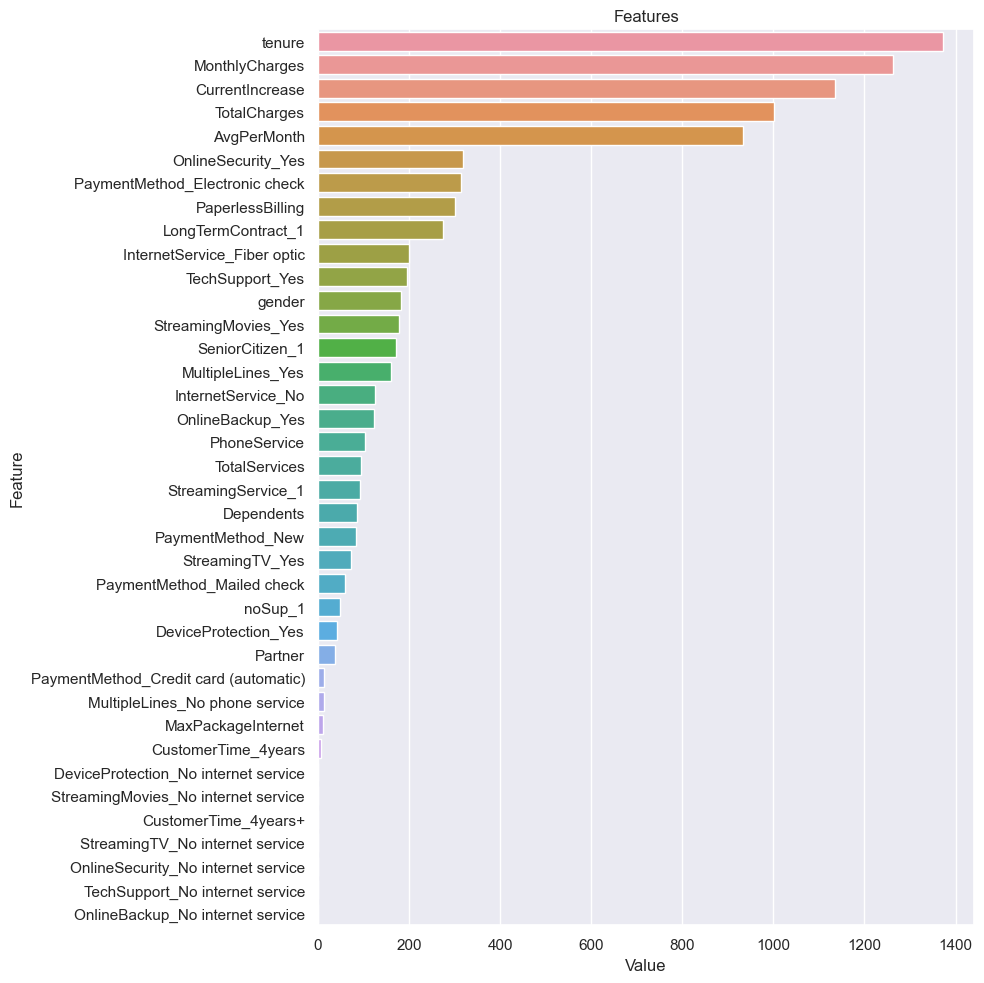

In [53]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(lgbm_final, X)